In [702]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler



from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [528]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20between%20%272019-03-11T00:00:00%27%20and%20%272019-03-12T00:00:00%27"
data = pd.read_json(url)

In [533]:
data = pd.read_csv("311_311.csv")

In [534]:
data.shape

(1000, 41)

In [535]:
data.head()

Unnamed: 0 address_type agency                              agency_name  \
0           0      ADDRESS  DOHMH  Department of Health and Mental Hygiene   
1           1      ADDRESS  DOHMH  Department of Health and Mental Hygiene   
2           2      LATLONG  DOHMH  Department of Health and Mental Hygiene   
3           3      ADDRESS  DOHMH  Department of Health and Mental Hygiene   
4           4      ADDRESS  DOHMH  Department of Health and Mental Hygiene   

            bbl    borough bridge_highway_direction bridge_highway_name  \
0  1.002240e+09  MANHATTAN                      NaN                 NaN   
1  1.002240e+09  MANHATTAN                      NaN                 NaN   
2           NaN     QUEENS                      NaN                 NaN   
3  1.020360e+09  MANHATTAN                      NaN                 NaN   
4  1.005260e+09  MANHATTAN                      NaN                 NaN   

  bridge_highway_segment      city        ...          \
0                    NaN  NEW YORK        ...           
1                    NaN  NEW YORK        ...           
2                    NaN  ELMHURST        ...           
3                    NaN  NEW YORK        ...           
4                    NaN  NEW YORK        ...           

                              resolution_description road_ramp  status  \
0  The Department of Health and Mental Hygiene wi...       NaN  Closed   
1  The Department of Health and Mental Hygiene wi...       NaN  Closed   
2  The Department of Health and Mental Hygiene wi...       NaN  Closed   
3  The Department of Health and Mental Hygiene wi...       NaN  Closed   
4  The Department of Health and Mental Hygiene wi...       NaN  Closed   

                   street_name taxi_company_borough taxi_pick_up_location  \
0                 WATTS STREET                  NaN                   NaN   
1                 WATTS STREET                  NaN                   NaN   
2                    45 AVENUE                  NaN                   NaN   
3  FREDRICK DOUGLASS BOULEVARD                  NaN                   NaN   
4             MACDOUGAL STREET                  NaN                   NaN   

  unique_key x_coordinate_state_plane y_coordinate_state_plane  \
0   41935505                 981542.0                 203092.0   
1   41929434                 981542.0                 203092.0   
2   41932348                1020716.0                 210495.0   
3   41929359                1001052.0                 240370.0   
4   41936077                 983869.0                 204858.0   

  resolution_outcome  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1  

[5 rows x 41 columns]

In [536]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [537]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [41]:
data['complaint_type'].value_counts()

HEAT/HOT WATER                         146
Noise - Residential                    117
Illegal Parking                         97
Rodent                                  91
Street Condition                        85
Blocked Driveway                        56
Noise - Commercial                      39
Request Large Bulky Item Collection     33
UNSANITARY CONDITION                    32
Noise                                   25
Noise - Vehicle                         25
Noise - Street/Sidewalk                 22
Traffic Signal Condition                15
Street Light Condition                  14
Non-Emergency Police Matter             13
PAINT/PLASTER                           11
Sanitation Condition                    11
Missed Collection (All Materials)       10
DOOR/WINDOW                              8
PLUMBING                                 8
Derelict Vehicles                        8
Derelict Vehicle                         8
WATER LEAK                               8
ELECTRIC   

In [20]:
data['agency'].value_counts()

NYPD     387
HPD      230
DOT      124
DOHMH    104
DSNY      77
DEP       44
DOB       16
DPR        7
TLC        5
DFTA       2
DCA        2
DHS        1
DOITT      1
Name: agency, dtype: int64

In [9]:
data['agency_name'].value_counts()

New York City Police Department                       386
Department of Housing Preservation and Development    230
Department of Transportation                          124
Department of Health and Mental Hygiene               103
Department of Environmental Protection                 44
Department of Sanitation                               39
Department of Buildings                                16
BCC - Brooklyn South                                   10
Department of Parks and Recreation                      7
BCC - Queens East                                       6
BCC - Queens West                                       5
Taxi and Limousine Commission                           5
A - Brooklyn                                            3
Department for the Aging                                2
Department of Consumer Affairs                          2
A - Manhattan                                           1
Bronx 11                                                1
Bronx 03      

In [9]:
data['complaint_type'][data['agency']=='NYPD'].value_counts()

Noise - Residential            117
Illegal Parking                 97
Blocked Driveway                56
Noise - Commercial              39
Noise - Vehicle                 25
Noise - Street/Sidewalk         22
Non-Emergency Police Matter     13
Derelict Vehicle                 8
Traffic                          4
Animal Abuse                     3
Homeless Encampment              2
Drinking                         1
Name: complaint_type, dtype: int64

In [10]:
data['complaint_type'][data['agency']=='HPD'].value_counts()

HEAT/HOT WATER            146
UNSANITARY CONDITION       32
PAINT/PLASTER              11
PLUMBING                    8
WATER LEAK                  8
DOOR/WINDOW                 8
ELECTRIC                    6
FLOORING/STAIRS             4
GENERAL                     3
HPD Literature Request      2
ELEVATOR                    1
APPLIANCE                   1
Name: complaint_type, dtype: int64

In [13]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Bus Stop Shelter Complaint     2
Sidewalk Condition             2
Curb Condition                 1
Street Sign - Damaged          1
Ferry Inquiry                  1
Highway Condition              1
Name: complaint_type, dtype: int64

In [18]:
[data['borough'].value_counts()]

[BROOKLYN         360
 QUEENS           219
 BRONX            185
 MANHATTAN        182
 STATEN ISLAND     44
 Unspecified       10
 Name: borough, dtype: int64]

In [841]:
data['complaint_type'][data['borough']=='STATEN ISLAND'].value_counts()

Street Condition                       12
Illegal Parking                         6
Noise - Residential                     6
Electronics Waste                       3
Request Large Bulky Item Collection     2
Animal Abuse                            2
Water System                            2
Derelict Vehicle                        2
Electrical                              1
Street Light Condition                  1
Noise - Vehicle                         1
Rodent                                  1
Overgrown Tree/Branches                 1
Traffic Signal Condition                1
Missed Collection (All Materials)       1
Unsanitary Animal Pvt Property          1
Non-Emergency Police Matter             1
Name: complaint_type, dtype: int64

In [171]:
data['resolution_description'].nunique()

92

In [35]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Sidewalk Condition             2
Bus Stop Shelter Complaint     2
Curb Condition                 1
Ferry Inquiry                  1
Street Sign - Damaged          1
Highway Condition              1
Name: complaint_type, dtype: int64

In [36]:
data['resolution_description'][data['agency']=='DOT'].nunique()

18

In [932]:
data['resolution_description'][data['agency']=='NYPD'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      136
The Police Department responded to the complaint and took action to fix the condition.                                                                                                        72
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                         50
The Police Department issued a summons in response to the complaint.                                                                                                                          46
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                               40
The Police Department responded to 

In [21]:
data['resolution_description'][data['agency']=='HPD'].nunique()

13

In [22]:
data['resolution_description'][data['agency']=='DOT'].nunique()

18

In [ ]:
#create new column 'pn_resolution' if resolution had a positive outcome or not
data['pn_resolution'] = 

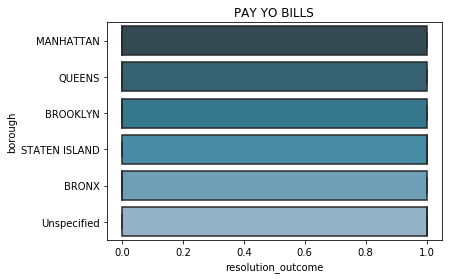

In [265]:
sns.boxplot(y = data['borough'] , x = data['resolution_outcome'], data = data, palette= 'PuBuGn_d').set_title('PAY YO BILLS')
plt.show()

/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


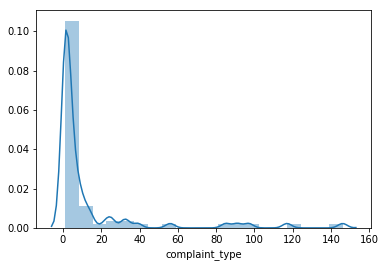

In [263]:
sns.distplot(data['resontu'].value_counts(), bins=20)

In [45]:
data['resolution_description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                 136
The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status                                                                                                                                                                                                                                                                 95
The complaint yo

In [45]:
data['resolution_outcome'] = [1 if re.search(\bno evidence|\bnot necessary|\bwere gone|\bunable to gain|\binsufficient contact|\bdoes not fall under|\bNo violations|\bnot able to gain access|\bcall 311 in 30 days|\bstatus 14 days|\b45 days after|\bno condition at|\bno violation at|\bfind any E-Waste|\bnot observe a violation|\bnot find the problem|\bcannot take action|\binside condition|\bno indication|\bfurther investigation is required|\brequires contact with|\bfor further action|\battempted to investigate|\bwas not found|\bup to 24 months|\bWithin 30 days|\bdid not find|\bmore than six months ago|\bnot have sufficient|\bcurb contract|\btemporarily addressed|\bmaximum of 30 days|\bunable to find) else 0 for x in data['resolution_description']]

SyntaxError: unexpected character after line continuation character (<ipython-input-45-21d22c331541>, line 1)

In [145]:
#positive
reg = "\btook action to fix|\bsummons in response|\bprovided additional information|\breport was prepared|\bduplicate of a condition|\badvised by a tenant|\bViolations were issued|\bconducted or attempted|\bViolations were previously|\bconditions were corrected|\bconditions are still open|\bwithin 24 hours|\bwithin 7 days|\bwarning them|\bremoved the items|\bcollected the E-waste|\bissued a Notice|\baddressed the issue|\bcollected the requested|\bcleaned the location|\bpicked up the items|\bduplicate of a previously|\bcomplainant's request|\bit could be closed|\bdefect found done|\brunning hydrant|\bperformed repair work|\bno asbestos was|\bflush water mains|\breplaced the damaged|\bresolved the issue|\bduplicate to another|\bno further action|\bwere addressed|\bissued an Office|\bperformed the work|\bcompleted the request|\bNo work is necessary|\bvisit the location|\brepaired the problem|\brequest is available on|\bYou can find additional information|\bmeets resurfacing|\bproblem was fixed|\bhas been completed|\bto address the issue|\bvalid permit|\bdefect was found"

In [199]:
#positive - + at end
reg = "took action to fix+|summons in response+|provided additional information+|report was prepared+|duplicate of a condition+|advised by a tenant|Violations were issued+|bconducted or attempted+|Violations were previously+|conditions were corrected+|conditions are still open+|within 24 hours+|within 7 days+|warning them+|removed the items+|collected the E-waste+|issued a Notice+|addressed the issue+|collected the requested+|cleaned the location+|picked up the items+|duplicate of a previously+|complainant's request+|it could be closed+|defect found done+|running hydrant+|performed repair work+|no asbestos was+|flush water mains+|replaced the damaged+|resolved the issue+|duplicate to another+|no further action+|were addressed+|issued an Office+|performed the work+|completed the request+|No work is necessary+|visit the location+|repaired the problem+|request is available on+|You can find additional information+|meets resurfacing+|problem was fixed+|has been completed+|to address the issue+|valid permit+|defect was found+"


In [221]:
#positive - just the string and |

reg = "took action to fix|summons in response|provided additional information|report was prepared|duplicate of a condition|advised by a tenant|Violations were issued|bconducted or attempted|Violations were previously|conditions were corrected|conditions are still open|within 24 hours|within 7 days|warning them|removed the items|collected the E-waste|issued a Notice|addressed the issue|collected the requested|cleaned the location|picked up the items|duplicate of a previously|complainant's request|it could be closed|defect found done|running hydrant|performed repair work|no asbestos was|flush water mains|replaced the damaged|resolved the issue|duplicate to another|no further action|were addressed|issued an Office|performed the work|completed the request|No work is necessary|visit the location|repaired the problem|request is available on|You can find additional information|meets resurfacing|problem was fixed|has been completed|to address the issue|valid permit|defect was found"


In [200]:
data['resolution_outcome'] = bool([re.search(reg, str(x)) for x in data['resolution_description']])

In [266]:
data['resolution_outcome'].value_counts()

0    614
1    386
Name: resolution_outcome, dtype: int64

In [225]:
bool(re.search(reg, "The Department of Transportation has completed the request or corrected the condition."))

True

In [212]:
bool([re.search(reg, str(data['resolution_description']))])

True

In [123]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [167]:
data['status'].value_counts()

Closed      972
Assigned     23
Open          4
Started       1
Name: status, dtype: int64

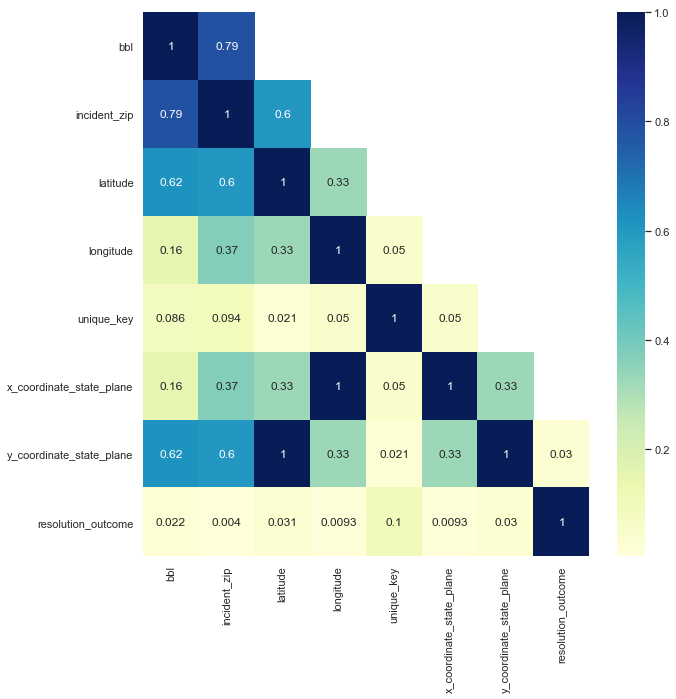

In [374]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap="YlGnBu")

Target Variable
0    614
1    386
Name: resolution_outcome, dtype: int64


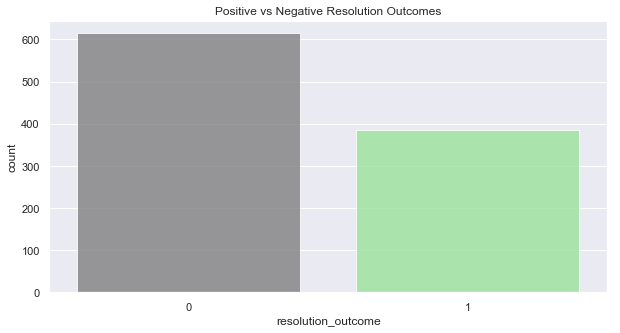

In [363]:
# Default Count
print('Target Variable')
print(data['resolution_outcome'].value_counts())
# print(data.groupby(['default payment next month']).SEX.count())

# To get a sense of the data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['resolution_outcome'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Positive vs Negative Resolution Outcomes')
# plt.ylabel('# ')
plt.show()

In [275]:
print(data.groupby(['borough','resolution_outcome']).borough.count().unstack())
pclass = data.groupby(['borough','resolution_outcome']).borough.count().unstack()

resolution_outcome    0    1
borough                     
BRONX               110   75
BROOKLYN            232  128
MANHATTAN           119   63
QUEENS              131   88
STATEN ISLAND        18   26
Unspecified           4    6


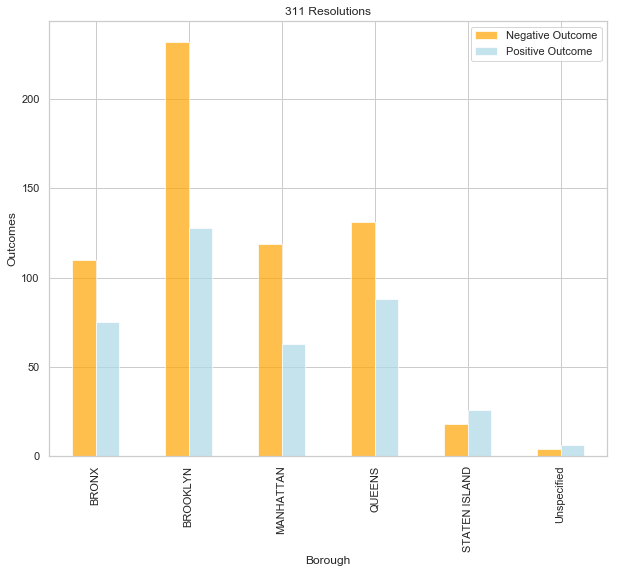

In [348]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = '311 Resolutions', 
                   color = ['orange','lightblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

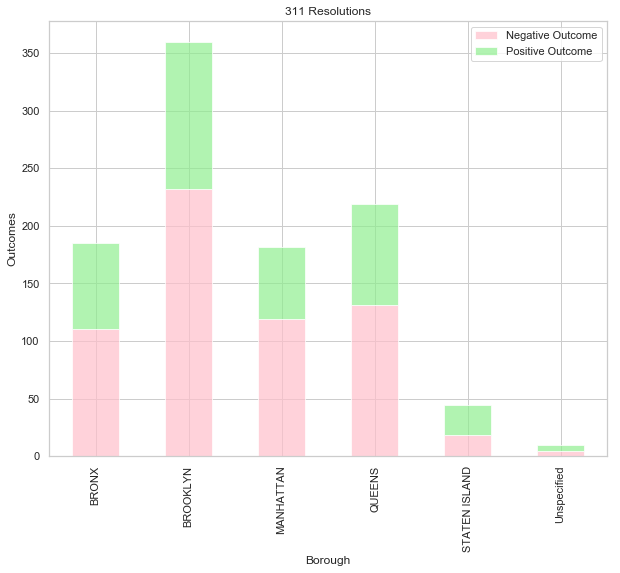

In [370]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions', 
                   color = ['pink','lightgreen'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

In [288]:
print(data.groupby(['agency','resolution_outcome']).borough.count().unstack())
pclass1 = data.groupby(['agency','resolution_outcome']).borough.count().unstack()

resolution_outcome      0      1
agency                          
DCA                   NaN    2.0
DEP                  29.0   15.0
DFTA                  NaN    2.0
DHS                   1.0    NaN
DOB                   1.0   15.0
DOHMH                97.0    7.0
DOITT                 NaN    1.0
DOT                  14.0  110.0
DPR                   3.0    4.0
DSNY                 53.0   24.0
HPD                 155.0   75.0
NYPD                256.0  131.0
TLC                   5.0    NaN


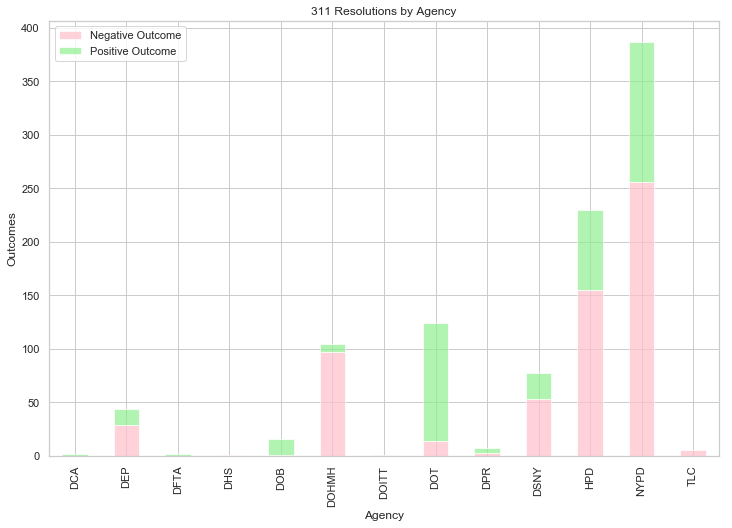

In [412]:
p1 = pclass1.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions by Agency', 
                   color = ['pink','lightgreen'], alpha = .70, figsize = (12,8))
p1.set_xlabel('Agency')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show();

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

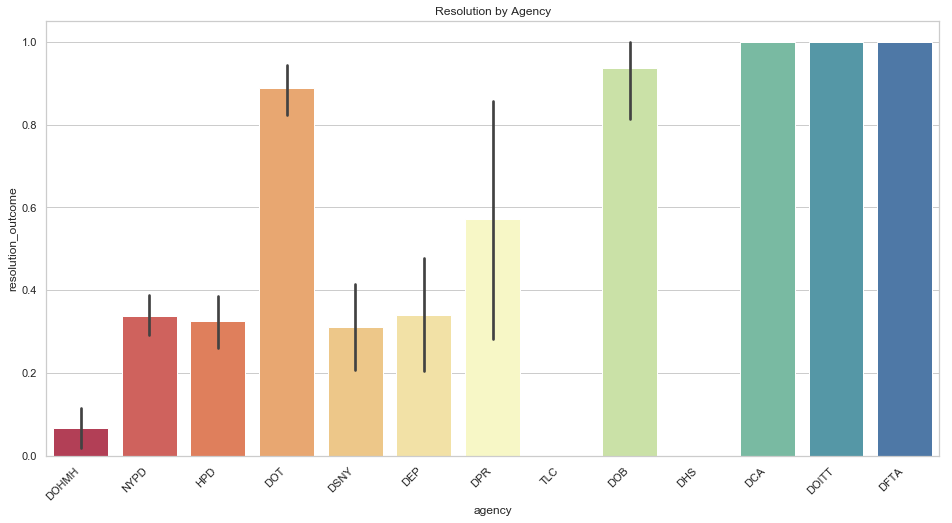

In [369]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="agency", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Resolution by Agency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


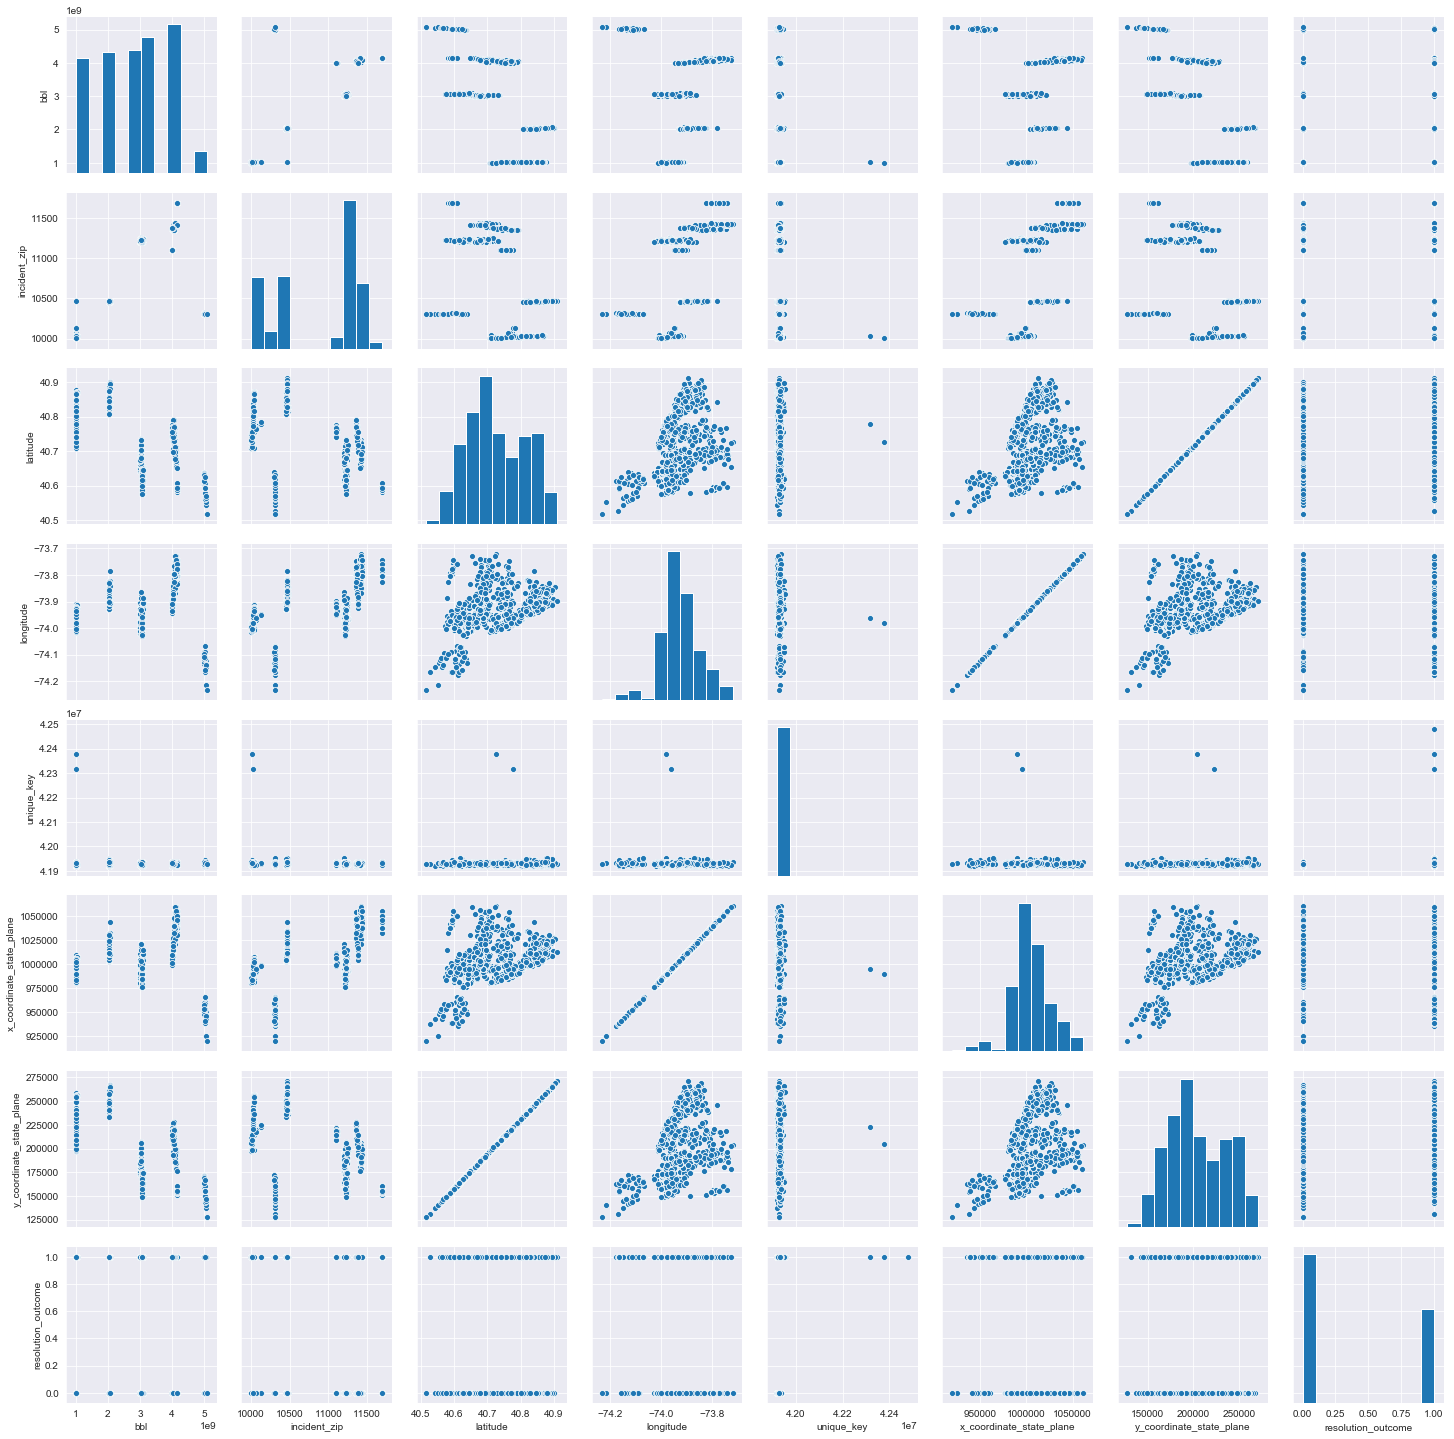

In [307]:
sns.pairplot(data)

In [321]:
data.head()

address_type agency                              agency_name           bbl  \
0      ADDRESS  DOHMH  Department of Health and Mental Hygiene  1.002240e+09   
1      ADDRESS  DOHMH  Department of Health and Mental Hygiene  1.002240e+09   
2      LATLONG  DOHMH  Department of Health and Mental Hygiene           NaN   
3      ADDRESS  DOHMH  Department of Health and Mental Hygiene  1.020360e+09   
4      ADDRESS  DOHMH  Department of Health and Mental Hygiene  1.005260e+09   

     borough bridge_highway_direction bridge_highway_name  \
0  MANHATTAN                      NaN                 NaN   
1  MANHATTAN                      NaN                 NaN   
2     QUEENS                      NaN                 NaN   
3  MANHATTAN                      NaN                 NaN   
4  MANHATTAN                      NaN                 NaN   

  bridge_highway_segment      city              closed_date  \
0                    NaN  NEW YORK  2019-04-22T00:00:00.000   
1                    NaN  NEW YORK  2019-04-22T00:00:00.000   
2                    NaN  ELMHURST  2019-04-01T00:00:00.000   
3                    NaN  NEW YORK  2019-04-03T00:00:00.000   
4                    NaN  NEW YORK  2019-03-11T00:00:01.000   

          ...                                     resolution_description  \
0         ...          The Department of Health and Mental Hygiene wi...   
1         ...          The Department of Health and Mental Hygiene wi...   
2         ...          The Department of Health and Mental Hygiene wi...   
3         ...          The Department of Health and Mental Hygiene wi...   
4         ...          The Department of Health and Mental Hygiene wi...   

  road_ramp  status                  street_name taxi_company_borough  \
0       NaN  Closed                 WATTS STREET                  NaN   
1       NaN  Closed                 WATTS STREET                  NaN   
2       NaN  Closed                    45 AVENUE                  NaN   
3       NaN  Closed  FREDRICK DOUGLASS BOULEVARD                  NaN   
4       NaN  Closed             MACDOUGAL STREET                  NaN   

  taxi_pick_up_location unique_key x_coordinate_state_plane  \
0                   NaN   41935505                 981542.0   
1                   NaN   41929434                 981542.0   
2                   NaN   41932348                1020716.0   
3                   NaN   41929359                1001052.0   
4                   NaN   41936077                 983869.0   

  y_coordinate_state_plane  resolution_outcome  
0                 203092.0                   0  
1                 203092.0                   0  
2                 210495.0                   0  
3                 240370.0                   0  
4                 204858.0                   1  

[5 rows x 40 columns]

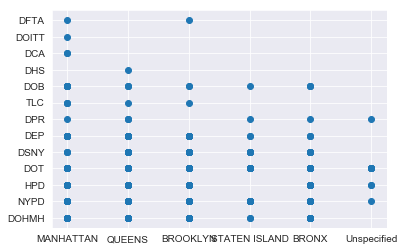

In [336]:
plt.scatter(data['borough'], data['agency'])

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

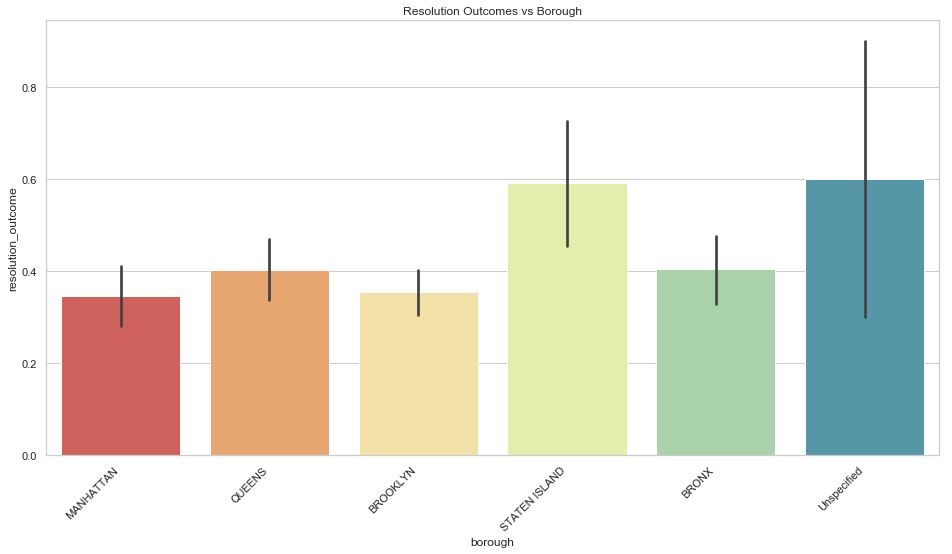

In [372]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="borough", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Resolution Outcomes vs Borough")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

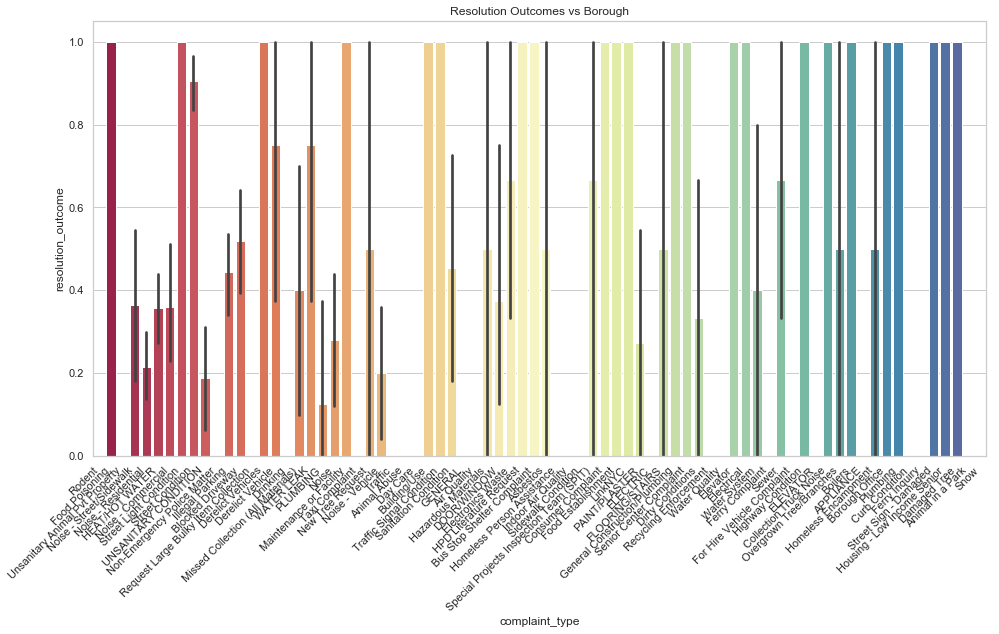

In [905]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="complaint_type", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Resolution Outcomes vs Borough")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

# order=titanic.deck.value_counts().iloc[:3].index

In [935]:
data.groupby('complaint_type').resolution_outcome.mean()

complaint_type
APPLIANCE                                  0.000000
Air Quality                                0.000000
Animal Abuse                               0.000000
Animal in a Park                           0.000000
Asbestos                                   0.500000
Blocked Driveway                           0.517857
Boilers                                    1.000000
Borough Office                             1.000000
Building/Use                               1.000000
Bus Stop Shelter Complaint                 1.000000
Collection Truck Noise                     1.000000
Consumer Complaint                         1.000000
Curb Condition                             0.000000
DOOR/WINDOW                                0.375000
Damaged Tree                               1.000000
Day Care                                   0.000000
Derelict Vehicle                           0.750000
Derelict Vehicles                          1.000000
Dirty Conditions                           0.3333

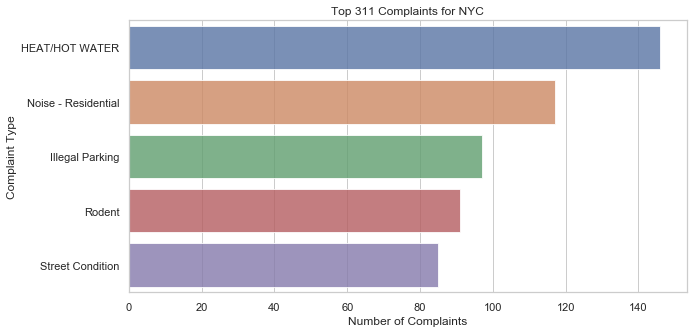

In [920]:
complaint_count  = data['complaint_type'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Complaints for NYC')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

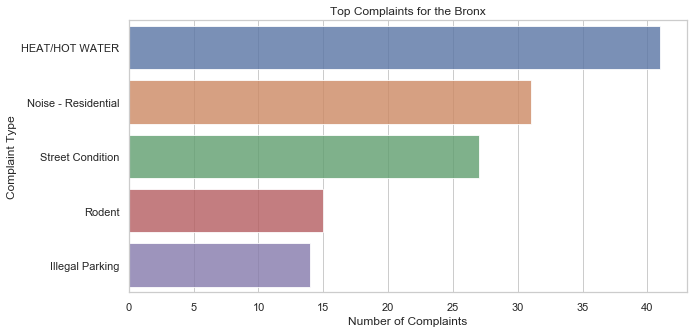

In [922]:
complaint_count  = data['complaint_type'][data['borough']=='BRONX'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for the Bronx')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

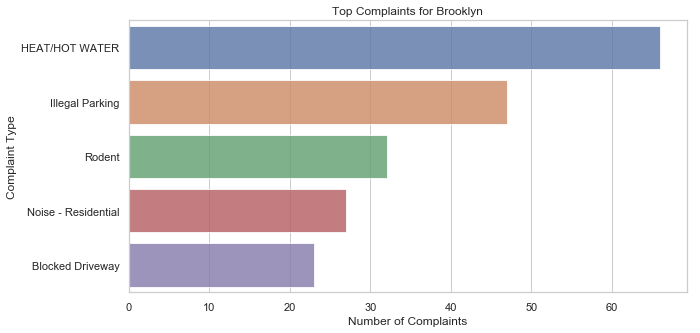

In [924]:
complaint_count  = data['complaint_type'][data['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Brooklyn')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

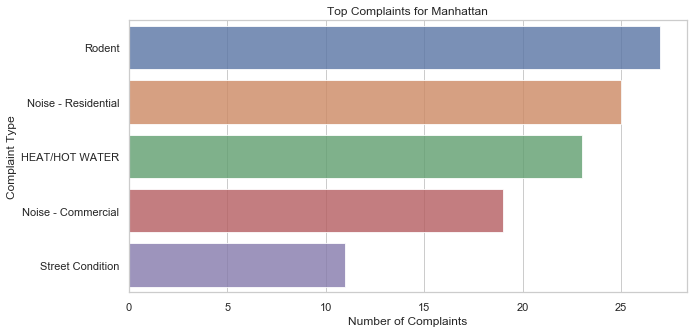

In [925]:
complaint_count  = data['complaint_type'][data['borough']=='MANHATTAN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Manhattan')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

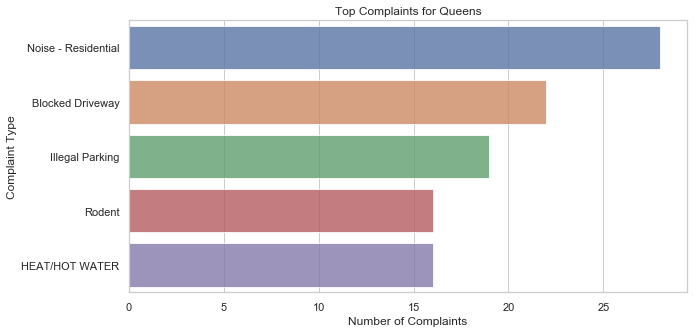

In [926]:
complaint_count  = data['complaint_type'][data['borough']=='QUEENS'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Queens')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

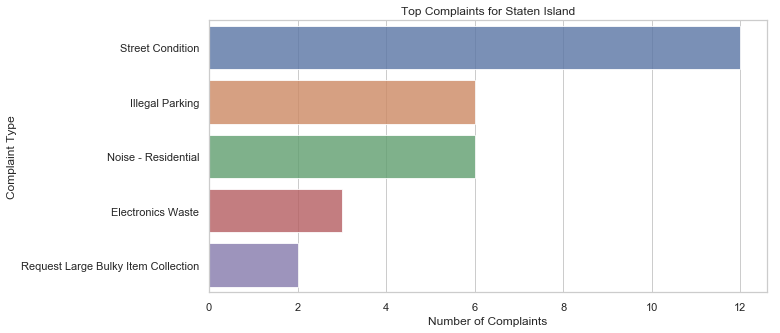

In [927]:
complaint_count  = data['complaint_type'][data['borough']=='STATEN ISLAND'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Staten Island')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

# Location Heatmap

In [ ]:
#40.7128° N, 74.0060° W  NYC

In [777]:
import folium
from folium import plugins

In [780]:
ndata.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'resolution_outcome'],
      dtype='object')

In [783]:
divvyStations = ndata[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
divvyStations.head()

agency    borough  complaint_type   latitude  longitude  resolution_outcome
0  DOHMH  MANHATTAN          Rodent  40.724117 -74.009770                   0
1  DOHMH  MANHATTAN          Rodent  40.724117 -74.009770                   0
2  DOHMH     QUEENS          Rodent  40.744362 -73.868400                   0
3  DOHMH  MANHATTAN          Rodent  40.826420 -73.939289                   0
4  DOHMH  MANHATTAN  Food Poisoning  40.728965 -74.001375                   1

In [787]:
divvyStations.shape

(1000, 6)

In [788]:
divvyStations.dropna(inplace=True)

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [789]:
divvyStations.shape

(972, 6)

In [779]:
m = folium.Map([40.7128, -74.0060], zoom_start=11)
m

In [790]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [791]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [795]:
rodent = data.loc[df['complaint_type'] == 'Rodent']

In [796]:
rodent.shape

(91, 40)

In [797]:
divvyStations = rodent[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]

In [798]:
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [802]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [803]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


Heat/Hot Water

In [807]:
heat = data.loc[df['complaint_type'] == 'HEAT/HOT WATER']

In [806]:
divvyStations = heat[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [805]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [808]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [809]:
noise = data.loc[df['complaint_type'] == 'Noise - Residential']

In [ ]:
divvyStations = noise[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [810]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [811]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


PoPo

In [819]:
popo = data.loc[df['agency'] == 'NYPD']

In [820]:
divvyStations = popo[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [822]:
divvyStations.dropna(inplace=True)
divvyStations.shape

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(386, 6)

In [823]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [824]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [792]:
data.complaint_type.value_counts()

HEAT/HOT WATER                         146
Noise - Residential                    117
Illegal Parking                         97
Rodent                                  91
Street Condition                        85
Blocked Driveway                        56
Noise - Commercial                      39
Request Large Bulky Item Collection     33
UNSANITARY CONDITION                    32
Noise                                   25
Noise - Vehicle                         25
Noise - Street/Sidewalk                 22
Traffic Signal Condition                15
Street Light Condition                  14
Non-Emergency Police Matter             13
Sanitation Condition                    11
PAINT/PLASTER                           11
Missed Collection (All Materials)       10
WATER LEAK                               8
DOOR/WINDOW                              8
PLUMBING                                 8
Derelict Vehicles                        8
Derelict Vehicle                         8
Electronics

# Feature Selection

In [358]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

GIMME EDA
most frequent complaint
most frequent complaint by borough

complaint w/ the highest positive outcome
complaint w/ the highest negative outcome

In [395]:
ndata = data.drop(['address_type', 'bbl', 'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'community_board',
       'cross_street_1', 'cross_street_2',
       'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'park_borough', 'park_facility_name',
       'road_ramp',
       'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'], axis=1)

In [409]:
ndata.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'resolution_outcome'],
      dtype='object')

In [520]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
agency                            1000 non-null object
agency_name                       1000 non-null object
borough                           1000 non-null object
city                              977 non-null object
closed_date                       972 non-null object
complaint_type                    1000 non-null object
created_date                      1000 non-null object
descriptor                        995 non-null object
due_date                          526 non-null object
facility_type                     413 non-null object
latitude                          972 non-null float64
location                          972 non-null object
location_type                     824 non-null object
longitude                         972 non-null float64
open_data_channel_type            1000 non-null object
resolution_action_updated_date    997 non-null object
resolution_description

In [544]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['borough'],prefix = 'b')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([ndata, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'resolution_outcome',
       'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified'],
      dtype='object')

In [545]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['agency'],prefix = 'a')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([df, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'resolution_outcome',
       'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified', 'a_DCA', 'a_DEP', 'a_DFTA', 'a_DHS', 'a_DOB',
       'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR', 'a_DSNY', 'a_HPD', 'a_NYPD',
       'a_TLC'],
      dtype='object')

In [550]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['complaint_type'],prefix = 'complaint')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([df, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type',
       ...
       'complaint_Street Light Condition', 'complaint_Street Sign - Damaged',
       'complaint_Taxi Complaint', 'complaint_Traffic',
       'complaint_Traffic Signal Condition', 'complaint_UNSANITARY CONDITION',
       'complaint_Unsanitary Animal Pvt Property', 'complaint_WATER LEAK',
       'complaint_Water Quality', 'complaint_Water System'],
      dtype='object', length=115)

In [552]:
df.shape

(1000, 115)

In [559]:
odata = df.drop(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name'], axis=1)

In [469]:
# col=['agency', 'resolution_outcome']

# odata = pd.DataFrame(data, columns=col)

In [560]:
odata.head()

resolution_outcome  b_BRONX  b_BROOKLYN  b_MANHATTAN  b_QUEENS  \
0                   0        0           0            1         0   
1                   0        0           0            1         0   
2                   0        0           0            0         1   
3                   0        0           0            1         0   
4                   1        0           0            1         0   

   b_STATEN ISLAND  b_Unspecified  a_DCA  a_DEP  a_DFTA  \
0                0              0      0      0       0   
1                0              0      0      0       0   
2                0              0      0      0       0   
3                0              0      0      0       0   
4                0              0      0      0       0   

            ...            complaint_Street Light Condition  \
0           ...                                           0   
1           ...                                           0   
2           ...                                           0   
3           ...                                           0   
4           ...                                           0   

   complaint_Street Sign - Damaged  complaint_Taxi Complaint  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   

   complaint_Traffic  complaint_Traffic Signal Condition  \
0                  0                                   0   
1                  0                                   0   
2                  0                                   0   
3                  0                                   0   
4                  0                                   0   

   complaint_UNSANITARY CONDITION  complaint_Unsanitary Animal Pvt Property  \
0                               0                                         0   
1                               0                                         0   
2                               0                                         0   
3                               0                                         0   
4                               0                                         0   

   complaint_WATER LEAK  complaint_Water Quality  complaint_Water System  
0                     0                        0                       0  
1                     0                        0                       0  
2                     0                        0                       0  
3                     0                        0                       0  
4                     0                        0                       0  

[5 rows x 96 columns]

In [643]:
odata.columns

Index(['resolution_outcome', 'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN',
       'b_QUEENS', 'b_STATEN ISLAND', 'b_Unspecified', 'a_DCA', 'a_DEP',
       'a_DFTA', 'a_DHS', 'a_DOB', 'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR',
       'a_DSNY', 'a_HPD', 'a_NYPD', 'a_TLC', 'complaint_APPLIANCE',
       'complaint_Air Quality', 'complaint_Animal Abuse',
       'complaint_Animal in a Park', 'complaint_Asbestos',
       'complaint_Blocked Driveway', 'complaint_Boilers',
       'complaint_Borough Office', 'complaint_Building/Use',
       'complaint_Bus Stop Shelter Complaint',
       'complaint_Collection Truck Noise', 'complaint_Consumer Complaint',
       'complaint_Curb Condition', 'complaint_DOOR/WINDOW',
       'complaint_Damaged Tree', 'complaint_Day Care',
       'complaint_Derelict Vehicle', 'complaint_Derelict Vehicles',
       'complaint_Dirty Conditions', 'complaint_Drinking',
       'complaint_ELECTRIC', 'complaint_ELEVATOR', 'complaint_Electrical',
       'complaint_Electronics Waste', 'c

# Logistic Regression

In [959]:
X = odata.drop('resolution_outcome', axis=1)
y = odata['resolution_outcome']
feature_cols = X.columns

In [960]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [961]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [962]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
# the model perfectly predicts
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    585
1    165
Name: resolution_outcome, dtype: int64
0    0.78
1    0.22
Name: resolution_outcome, dtype: float64


In [963]:
#we subtract the y_test with the y_predition
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    182
1     68
Name: resolution_outcome, dtype: int64
0    0.728
1    0.272
Name: resolution_outcome, dtype: float64


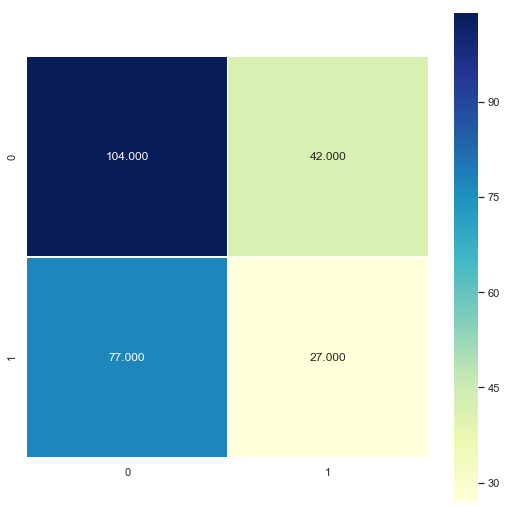

In [964]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# Feature Engineering for Logistic Regression

In [575]:
print(X.columns)
print(logreg.coef_)

Index(['b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified', 'a_DCA', 'a_DEP', 'a_DFTA', 'a_DHS', 'a_DOB',
       'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR', 'a_DSNY', 'a_HPD', 'a_NYPD',
       'a_TLC', 'complaint_APPLIANCE', 'complaint_Air Quality',
       'complaint_Animal Abuse', 'complaint_Animal in a Park',
       'complaint_Asbestos', 'complaint_Blocked Driveway', 'complaint_Boilers',
       'complaint_Borough Office', 'complaint_Building/Use',
       'complaint_Bus Stop Shelter Complaint',
       'complaint_Collection Truck Noise', 'complaint_Consumer Complaint',
       'complaint_Curb Condition', 'complaint_DOOR/WINDOW',
       'complaint_Damaged Tree', 'complaint_Day Care',
       'complaint_Derelict Vehicle', 'complaint_Derelict Vehicles',
       'complaint_Dirty Conditions', 'complaint_Drinking',
       'complaint_ELECTRIC', 'complaint_ELEVATOR', 'complaint_Electrical',
       'complaint_Electronics Waste', 'complaint_Elevator',
       'c

In [965]:
X.drop(columns=['b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'a_DSNY', 'complaint_Boilers', 'complaint_Curb Condition', 'complaint_Drinking'], inplace=True)


In [966]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(penalty='l2', fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [967]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    570
1    180
Name: resolution_outcome, dtype: int64
0    0.76
1    0.24
Name: resolution_outcome, dtype: float64


In [968]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    191
1     59
Name: resolution_outcome, dtype: int64
0    0.764
1    0.236
Name: resolution_outcome, dtype: float64


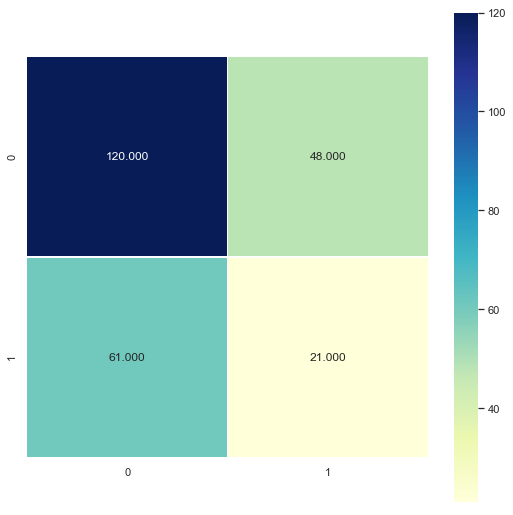

In [969]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# UPSAMPLE

In [970]:
df.groupby(['resolution_outcome']).borough.count()

resolution_outcome
0    614
1    386
Name: borough, dtype: int64

In [971]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [953]:
training.head()

b_QUEENS  b_STATEN ISLAND  b_Unspecified  a_DCA  a_DEP  a_DFTA  a_DHS  \
936         0                0              0      0      0       0      0   
311         0                0              0      0      0       0      0   
109         1                0              0      0      0       0      0   
546         0                0              0      0      0       0      0   
352         0                0              0      0      0       0      0   

     a_DOB  a_DOHMH  a_DOITT         ...          \
936      0        0        0         ...           
311      0        0        0         ...           
109      0        0        0         ...           
546      0        0        0         ...           
352      0        0        0         ...           

     complaint_Street Sign - Damaged  complaint_Taxi Complaint  \
936                                0                         0   
311                                0                         0   
109                                0                         0   
546                                0                         0   
352                                0                         0   

     complaint_Traffic  complaint_Traffic Signal Condition  \
936                  0                                   0   
311                  0                                   0   
109                  0                                   0   
546                  0                                   0   
352                  0                                   0   

     complaint_UNSANITARY CONDITION  complaint_Unsanitary Animal Pvt Property  \
936                               0                                         0   
311                               0                                         0   
109                               0                                         0   
546                               0                                         0   
352                               0                                         0   

     complaint_WATER LEAK  complaint_Water Quality  complaint_Water System  \
936                     0                        0                       0   
311                     0                        0                       0   
109                     0                        0                       0   
546                     0                        0                       0   
352                     0                        0                       0   

     resolution_outcome  
936                   1  
311                   1  
109                   0  
546                   1  
352                   1  

[5 rows x 89 columns]

In [972]:
# separate minority and majority classes
negative = training[training.resolution_outcome==0]
positive = training[training.resolution_outcome==1]

In [973]:
print('negative outcomes count: '+ str(len(negative)))
print('positive outcomes count: '+ str(len(positive)))

negative outcomes count: 446
positive outcomes count: 304


In [974]:
# upsample minority
positive_upsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(negative), # match number in majority class
                          random_state=23) # reproducible results


In [975]:
# combine majority and upsampled minority
upsampled = pd.concat([negative, positive_upsampled])

# check new class counts
upsampled.resolution_outcome.value_counts()

1    446
0    446
Name: resolution_outcome, dtype: int64

In [976]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.resolution_outcome
X_train = upsampled.drop('resolution_outcome', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))



Test Accuracy score:  0.768
Test F1 score:  0.6588235294117647


# SMOTE Upsample

In [978]:

# setting up testing and training sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [979]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.768
Test F1 score:  0.6588235294117647


# Downsample

In [980]:
print('negative outcomes count: '+ str(len(negative)))
print('positive outcomes count: '+ str(len(positive)))

negative outcomes count: 446
positive outcomes count: 304


In [981]:
# downsample majority
negative_downsampled = resample(negative,
                                replace = False, # sample without replacement
                                n_samples = len(positive), # match minority n
                                random_state = 23) # reproducible results




In [982]:
# combine minority and downsampled majority
downsampled = pd.concat([negative_downsampled, positive])

# checking counts
downsampled.resolution_outcome.value_counts()

1    304
0    304
Name: resolution_outcome, dtype: int64

In [983]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.resolution_outcome
X_train = downsampled.drop('resolution_outcome', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

Test Accuracy score:  0.74
Test F1 score:  0.632768361581921


# SMOTE Downsample

In [984]:

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [985]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.724
Test F1 score:  0.6634146341463415


# Random Forests

In [986]:
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)

In [648]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [987]:
X = odata.drop('resolution_outcome', axis=1)
y = odata['resolution_outcome']
feature_cols = X.columns

In [988]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [989]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [990]:
rfc_pred = rfc.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.72
Test F1 score:  0.5205479452054794


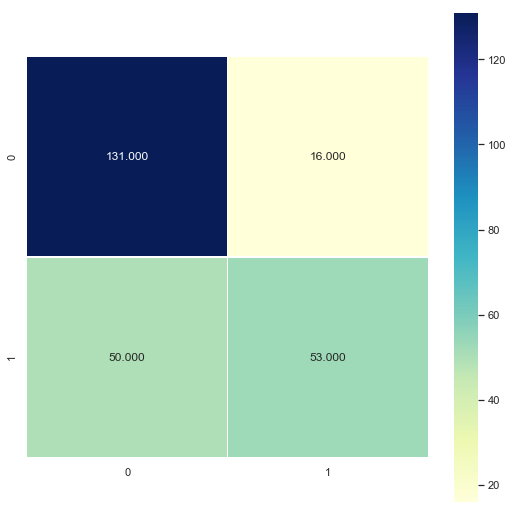

In [991]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

In [992]:
param_grid = { 
    'n_estimators': [200,300], #tree
    'max_features': [0.25, 0.33, 0.5 ], #every single node, trying to decide which feature to split on
    'max_depth' : [5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [993]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=5, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 300], 'max_features': [0.25, 0.33, 0.5], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [994]:
CV_rfc.best_params_

{'max_depth': 5,
 'max_features': 0.25,
 'min_samples_leaf': 0.03,
 'n_estimators': 200}

In [996]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.692
Test F1 score:  0.4460431654676259


### errors/concerns

In [682]:
print(ndata['agency'][0])
type(ndata['agency'][0])

DOHMH


str

# KNN

In [998]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome

In [999]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

 


In [1000]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  import sys


In [1001]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)

In [1002]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7638888888888888
Recall Score: 0.5339805825242718
Accuracy Score: 0.74
F1 Score: 0.6285714285714286


In [1003]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [1004]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 3
F1-Score: 0.6597938144329898


# Decision Tree

In [724]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

In [725]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.6578366445916114
Testing F1 Score: 0.6162790697674418


In [728]:
parameters={'max_depth': range(2,20,1),
            'max_features': range(1,96,5) }

In [735]:
grid_tree=GridSearchCV(clf,parameters, verbose=5, cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
[CV] max_depth=2, max_features=1 .....................................
[CV]  max_depth=2, max_features=1, score=0.06779661016949151, total=   0.0s
[CV] max_depth=2, max_features=1 .....................................
[CV] ........... max_depth=2, max_features=1, score=0.0, total=   0.0s
[CV] max_depth=2, max_features=1 .....................................
[CV] ........... max_depth=2, max_features=1, score=0.0, total=   0.0s
[CV] max_depth=2, max_features=1 .....................................
[CV] ........... max_depth=2, max_features=1, score=0.0, total=   0.0s
[CV] max_depth=2, max_features=1 .....................................
[CV]  max_depth=2, max_features=1, score=0.03508771929824561, total=   0.0s
[CV] max_depth=2, max_features=6 .....................................
[CV]  max_depth=2, max_features=6, score=0.34285714285714286, total=   0.0s
[CV] max_depth=2, max_features=6 ....................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicte

[CV]  max_depth=2, max_features=21, score=0.13333333333333333, total=   0.0s
[CV] max_depth=2, max_features=26 ....................................
[CV]  max_depth=2, max_features=26, score=0.3835616438356165, total=   0.0s
[CV] max_depth=2, max_features=26 ....................................
[CV]  max_depth=2, max_features=26, score=0.4935064935064935, total=   0.0s
[CV] max_depth=2, max_features=26 ....................................
[CV] .......... max_depth=2, max_features=26, score=0.0, total=   0.0s
[CV] max_depth=2, max_features=26 ....................................
[CV]  max_depth=2, max_features=26, score=0.19047619047619047, total=   0.0s
[CV] max_depth=2, max_features=26 ....................................
[CV]  max_depth=2, max_features=26, score=0.34782608695652173, total=   0.0s
[CV] max_depth=2, max_features=31 ....................................
[CV]  max_depth=2, max_features=31, score=0.34285714285714286, total=   0.0s
[CV] max_depth=2, max_features=31 .........

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  max_depth=2, max_features=51, score=0.4935064935064935, total=   0.0s
[CV] max_depth=2, max_features=51 ....................................
[CV]  max_depth=2, max_features=51, score=0.4166666666666667, total=   0.0s
[CV] max_depth=2, max_features=51 ....................................
[CV]  max_depth=2, max_features=51, score=0.32352941176470584, total=   0.0s
[CV] max_depth=2, max_features=51 ....................................
[CV]  max_depth=2, max_features=51, score=0.48717948717948717, total=   0.0s
[CV] max_depth=2, max_features=56 ....................................
[CV] .......... max_depth=2, max_features=56, score=0.0, total=   0.0s
[CV] max_depth=2, max_features=56 ....................................
[CV]  max_depth=2, max_features=56, score=0.4935064935064935, total=   0.0s
[CV] max_depth=2, max_features=56 ....................................
[CV]  max_depth=2, max_features=56, score=0.29850746268656714, total=   0.0s
[CV] max_depth=2, max_features=56 ..........

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  max_depth=2, max_features=76, score=0.44155844155844154, total=   0.0s
[CV] max_depth=2, max_features=76 ....................................
[CV]  max_depth=2, max_features=76, score=0.4935064935064935, total=   0.0s
[CV] max_depth=2, max_features=76 ....................................
[CV]  max_depth=2, max_features=76, score=0.4166666666666667, total=   0.0s
[CV] max_depth=2, max_features=76 ....................................
[CV]  max_depth=2, max_features=76, score=0.3188405797101449, total=   0.0s
[CV] max_depth=2, max_features=76 ....................................
[CV]  max_depth=2, max_features=76, score=0.48717948717948717, total=   0.0s
[CV] max_depth=2, max_features=81 ....................................
[CV]  max_depth=2, max_features=81, score=0.3835616438356165, total=   0.0s
[CV] max_depth=2, max_features=81 ....................................
[CV]  max_depth=2, max_features=81, score=0.4935064935064935, total=   0.0s
[CV] max_depth=2, max_features=81 ......

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metric

[CV]  max_depth=3, max_features=6, score=0.06666666666666667, total=   0.0s
[CV] max_depth=3, max_features=6 .....................................
[CV] ........... max_depth=3, max_features=6, score=0.0, total=   0.0s
[CV] max_depth=3, max_features=6 .....................................
[CV]  max_depth=3, max_features=6, score=0.09677419354838708, total=   0.0s
[CV] max_depth=3, max_features=6 .....................................
[CV] ........... max_depth=3, max_features=6, score=0.0, total=   0.0s
[CV] max_depth=3, max_features=6 .....................................
[CV] ........... max_depth=3, max_features=6, score=0.0, total=   0.0s
[CV] max_depth=3, max_features=11 ....................................
[CV]  max_depth=3, max_features=11, score=0.3835616438356165, total=   0.0s
[CV] max_depth=3, max_features=11 ....................................
[CV]  max_depth=3, max_features=11, score=0.38888888888888884, total=   0.0s
[CV] max_depth=3, max_features=11 ......................

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  max_depth=3, max_features=51, score=0.4383561643835616, total=   0.0s
[CV] max_depth=3, max_features=56 ....................................
[CV]  max_depth=3, max_features=56, score=0.44155844155844154, total=   0.0s
[CV] max_depth=3, max_features=56 ....................................
[CV]  max_depth=3, max_features=56, score=0.4935064935064935, total=   0.0s
[CV] max_depth=3, max_features=56 ....................................
[CV]  max_depth=3, max_features=56, score=0.4109589041095891, total=   0.0s
[CV] max_depth=3, max_features=56 ....................................
[CV]  max_depth=3, max_features=56, score=0.32352941176470584, total=   0.0s
[CV] max_depth=3, max_features=56 ....................................
[CV]  max_depth=3, max_features=56, score=0.5063291139240507, total=   0.0s
[CV] max_depth=3, max_features=61 ....................................
[CV]  max_depth=3, max_features=61, score=0.40540540540540543, total=   0.0s
[CV] max_depth=3, max_features=61 .....

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metric

[CV]  max_depth=4, max_features=11, score=0.4383561643835616, total=   0.0s
[CV] max_depth=4, max_features=16 ....................................
[CV]  max_depth=4, max_features=16, score=0.34285714285714286, total=   0.0s
[CV] max_depth=4, max_features=16 ....................................
[CV]  max_depth=4, max_features=16, score=0.37837837837837834, total=   0.0s
[CV] max_depth=4, max_features=16 ....................................
[CV]  max_depth=4, max_features=16, score=0.4556962025316456, total=   0.0s
[CV] max_depth=4, max_features=16 ....................................
[CV]  max_depth=4, max_features=16, score=0.13333333333333333, total=   0.0s
[CV] max_depth=4, max_features=16 ....................................
[CV]  max_depth=4, max_features=16, score=0.1639344262295082, total=   0.0s
[CV] max_depth=4, max_features=21 ....................................
[CV]  max_depth=4, max_features=21, score=0.44155844155844154, total=   0.0s
[CV] max_depth=4, max_features=21 ....

[CV]  max_depth=4, max_features=71, score=0.4166666666666667, total=   0.0s
[CV] max_depth=4, max_features=71 ....................................
[CV]  max_depth=4, max_features=71, score=0.32352941176470584, total=   0.0s
[CV] max_depth=4, max_features=71 ....................................
[CV]  max_depth=4, max_features=71, score=0.48717948717948717, total=   0.0s
[CV] max_depth=4, max_features=76 ....................................
[CV]  max_depth=4, max_features=76, score=0.44155844155844154, total=   0.0s
[CV] max_depth=4, max_features=76 ....................................
[CV]  max_depth=4, max_features=76, score=0.4935064935064935, total=   0.0s
[CV] max_depth=4, max_features=76 ....................................
[CV]  max_depth=4, max_features=76, score=0.4166666666666667, total=   0.0s
[CV] max_depth=4, max_features=76 ....................................
[CV]  max_depth=4, max_features=76, score=0.34782608695652173, total=   0.0s
[CV] max_depth=4, max_features=76 ....

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... max_depth=5, max_features=16, score=0.1, total=   0.0s
[CV] max_depth=5, max_features=16 ....................................
[CV]  max_depth=5, max_features=16, score=0.47368421052631576, total=   0.0s
[CV] max_depth=5, max_features=16 ....................................
[CV]  max_depth=5, max_features=16, score=0.3188405797101449, total=   0.0s
[CV] max_depth=5, max_features=16 ....................................
[CV]  max_depth=5, max_features=16, score=0.6304347826086957, total=   0.0s
[CV] max_depth=5, max_features=21 ....................................
[CV]  max_depth=5, max_features=21, score=0.3953488372093023, total=   0.0s
[CV] max_depth=5, max_features=21 ....................................
[CV]  max_depth=5, max_features=21, score=0.4935064935064935, total=   0.0s
[CV] max_depth=5, max_features=21 ....................................
[CV]  max_depth=5, max_features=21, score=0.4324324324324324, total=   0.0s
[CV] max_depth=5, max_features=21 ............

[CV]  max_depth=5, max_features=76, score=0.44155844155844154, total=   0.0s
[CV] max_depth=5, max_features=76 ....................................
[CV]  max_depth=5, max_features=76, score=0.4935064935064935, total=   0.0s
[CV] max_depth=5, max_features=76 ....................................
[CV]  max_depth=5, max_features=76, score=0.4166666666666667, total=   0.0s
[CV] max_depth=5, max_features=76 ....................................
[CV]  max_depth=5, max_features=76, score=0.3714285714285714, total=   0.0s
[CV] max_depth=5, max_features=76 ....................................
[CV]  max_depth=5, max_features=76, score=0.5783132530120482, total=   0.0s
[CV] max_depth=5, max_features=81 ....................................
[CV]  max_depth=5, max_features=81, score=0.44155844155844154, total=   0.0s
[CV] max_depth=5, max_features=81 ....................................
[CV]  max_depth=5, max_features=81, score=0.5316455696202531, total=   0.0s
[CV] max_depth=5, max_features=81 ......

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  max_depth=6, max_features=26, score=0.40540540540540543, total=   0.0s
[CV] max_depth=6, max_features=26 ....................................
[CV]  max_depth=6, max_features=26, score=0.34285714285714286, total=   0.0s
[CV] max_depth=6, max_features=26 ....................................
[CV]  max_depth=6, max_features=26, score=0.5476190476190476, total=   0.0s
[CV] max_depth=6, max_features=31 ....................................
[CV]  max_depth=6, max_features=31, score=0.46153846153846156, total=   0.0s
[CV] max_depth=6, max_features=31 ....................................
[CV]  max_depth=6, max_features=31, score=0.4935064935064935, total=   0.0s
[CV] max_depth=6, max_features=31 ....................................
[CV]  max_depth=6, max_features=31, score=0.40540540540540543, total=   0.0s
[CV] max_depth=6, max_features=31 ....................................
[CV]  max_depth=6, max_features=31, score=0.34782608695652173, total=   0.0s
[CV] max_depth=6, max_features=31 ...

[CV]  max_depth=6, max_features=91, score=0.40540540540540543, total=   0.0s
[CV] max_depth=6, max_features=91 ....................................
[CV]  max_depth=6, max_features=91, score=0.39436619718309857, total=   0.0s
[CV] max_depth=6, max_features=91 ....................................
[CV]  max_depth=6, max_features=91, score=0.5063291139240507, total=   0.0s
[CV] max_depth=7, max_features=1 .....................................
[CV]  max_depth=7, max_features=1, score=0.06666666666666667, total=   0.0s
[CV] max_depth=7, max_features=1 .....................................
[CV] ........... max_depth=7, max_features=1, score=0.0, total=   0.0s
[CV] max_depth=7, max_features=1 .....................................
[CV] ........ max_depth=7, max_features=1, score=0.1875, total=   0.0s
[CV] max_depth=7, max_features=1 .....................................
[CV]  max_depth=7, max_features=1, score=0.2153846153846154, total=   0.0s
[CV] max_depth=7, max_features=1 ..................

[CV]  max_depth=7, max_features=66, score=0.5185185185185185, total=   0.0s
[CV] max_depth=7, max_features=66 ....................................
[CV]  max_depth=7, max_features=66, score=0.4556962025316456, total=   0.0s
[CV] max_depth=7, max_features=66 ....................................
[CV]  max_depth=7, max_features=66, score=0.39436619718309857, total=   0.0s
[CV] max_depth=7, max_features=66 ....................................
[CV] ........ max_depth=7, max_features=66, score=0.525, total=   0.0s
[CV] max_depth=7, max_features=71 ....................................
[CV] ........ max_depth=7, max_features=71, score=0.475, total=   0.0s
[CV] max_depth=7, max_features=71 ....................................
[CV]  max_depth=7, max_features=71, score=0.5185185185185185, total=   0.0s
[CV] max_depth=7, max_features=71 ....................................
[CV]  max_depth=7, max_features=71, score=0.40540540540540543, total=   0.0s
[CV] max_depth=7, max_features=71 ................

[CV]  max_depth=8, max_features=31, score=0.39436619718309857, total=   0.0s
[CV] max_depth=8, max_features=31 ....................................
[CV]  max_depth=8, max_features=31, score=0.611764705882353, total=   0.0s
[CV] max_depth=8, max_features=36 ....................................
[CV]  max_depth=8, max_features=36, score=0.46153846153846156, total=   0.0s
[CV] max_depth=8, max_features=36 ....................................
[CV]  max_depth=8, max_features=36, score=0.5176470588235293, total=   0.0s
[CV] max_depth=8, max_features=36 ....................................
[CV]  max_depth=8, max_features=36, score=0.49411764705882344, total=   0.0s
[CV] max_depth=8, max_features=36 ....................................
[CV]  max_depth=8, max_features=36, score=0.45945945945945943, total=   0.0s
[CV] max_depth=8, max_features=36 ....................................
[CV]  max_depth=8, max_features=36, score=0.5194805194805194, total=   0.0s
[CV] max_depth=8, max_features=41 .....

[CV] .......... max_depth=9, max_features=16, score=0.4, total=   0.0s
[CV] max_depth=9, max_features=16 ....................................
[CV]  max_depth=9, max_features=16, score=0.5116279069767441, total=   0.0s
[CV] max_depth=9, max_features=21 ....................................
[CV]  max_depth=9, max_features=21, score=0.481012658227848, total=   0.0s
[CV] max_depth=9, max_features=21 ....................................
[CV]  max_depth=9, max_features=21, score=0.5316455696202531, total=   0.0s
[CV] max_depth=9, max_features=21 ....................................
[CV]  max_depth=9, max_features=21, score=0.4871794871794871, total=   0.0s
[CV] max_depth=9, max_features=21 ....................................
[CV]  max_depth=9, max_features=21, score=0.34782608695652173, total=   0.0s
[CV] max_depth=9, max_features=21 ....................................
[CV] ........ max_depth=9, max_features=21, score=0.525, total=   0.0s
[CV] max_depth=9, max_features=26 ..................

[CV] .......... max_depth=10, max_features=1, score=0.1, total=   0.0s
[CV] max_depth=10, max_features=1 ....................................
[CV]  max_depth=10, max_features=1, score=0.1794871794871795, total=   0.0s
[CV] max_depth=10, max_features=1 ....................................
[CV]  max_depth=10, max_features=1, score=0.15384615384615383, total=   0.0s
[CV] max_depth=10, max_features=1 ....................................
[CV]  max_depth=10, max_features=1, score=0.12307692307692308, total=   0.0s
[CV] max_depth=10, max_features=1 ....................................
[CV]  max_depth=10, max_features=1, score=0.5476190476190476, total=   0.0s
[CV] max_depth=10, max_features=6 ....................................
[CV]  max_depth=10, max_features=6, score=0.44736842105263164, total=   0.0s
[CV] max_depth=10, max_features=6 ....................................
[CV]  max_depth=10, max_features=6, score=0.5060240963855421, total=   0.0s
[CV] max_depth=10, max_features=6 ..........

[CV]  max_depth=10, max_features=71, score=0.611764705882353, total=   0.0s
[CV] max_depth=10, max_features=76 ...................................
[CV] ....... max_depth=10, max_features=76, score=0.475, total=   0.0s
[CV] max_depth=10, max_features=76 ...................................
[CV]  max_depth=10, max_features=76, score=0.5185185185185185, total=   0.0s
[CV] max_depth=10, max_features=76 ...................................
[CV]  max_depth=10, max_features=76, score=0.4675324675324675, total=   0.0s
[CV] max_depth=10, max_features=76 ...................................
[CV]  max_depth=10, max_features=76, score=0.3835616438356164, total=   0.0s
[CV] max_depth=10, max_features=76 ...................................
[CV]  max_depth=10, max_features=76, score=0.611764705882353, total=   0.0s
[CV] max_depth=10, max_features=81 ...................................
[CV] ....... max_depth=10, max_features=81, score=0.475, total=   0.0s
[CV] max_depth=10, max_features=81 ..............

[CV]  max_depth=11, max_features=66, score=0.5060240963855421, total=   0.0s
[CV] max_depth=11, max_features=66 ...................................
[CV]  max_depth=11, max_features=66, score=0.4675324675324675, total=   0.0s
[CV] max_depth=11, max_features=66 ...................................
[CV]  max_depth=11, max_features=66, score=0.4054054054054054, total=   0.0s
[CV] max_depth=11, max_features=66 ...................................
[CV]  max_depth=11, max_features=66, score=0.627906976744186, total=   0.0s
[CV] max_depth=11, max_features=71 ...................................
[CV] ....... max_depth=11, max_features=71, score=0.475, total=   0.0s
[CV] max_depth=11, max_features=71 ...................................
[CV]  max_depth=11, max_features=71, score=0.5185185185185185, total=   0.0s
[CV] max_depth=11, max_features=71 ...................................
[CV]  max_depth=11, max_features=71, score=0.44736842105263164, total=   0.0s
[CV] max_depth=11, max_features=71 ......

[CV] ....... max_depth=12, max_features=31, score=0.475, total=   0.0s
[CV] max_depth=12, max_features=31 ...................................
[CV]  max_depth=12, max_features=31, score=0.5185185185185185, total=   0.0s
[CV] max_depth=12, max_features=31 ...................................
[CV]  max_depth=12, max_features=31, score=0.4266666666666667, total=   0.0s
[CV] max_depth=12, max_features=31 ...................................
[CV] ......... max_depth=12, max_features=31, score=0.4, total=   0.0s
[CV] max_depth=12, max_features=31 ...................................
[CV]  max_depth=12, max_features=31, score=0.627906976744186, total=   0.0s
[CV] max_depth=12, max_features=36 ...................................
[CV]  max_depth=12, max_features=36, score=0.40540540540540543, total=   0.0s
[CV] max_depth=12, max_features=36 ...................................
[CV]  max_depth=12, max_features=36, score=0.5882352941176471, total=   0.0s
[CV] max_depth=12, max_features=36 ............

[CV]  max_depth=13, max_features=21, score=0.5185185185185185, total=   0.0s
[CV] max_depth=13, max_features=21 ...................................
[CV]  max_depth=13, max_features=21, score=0.46153846153846156, total=   0.0s
[CV] max_depth=13, max_features=21 ...................................
[CV]  max_depth=13, max_features=21, score=0.44155844155844154, total=   0.0s
[CV] max_depth=13, max_features=21 ...................................
[CV]  max_depth=13, max_features=21, score=0.611764705882353, total=   0.0s
[CV] max_depth=13, max_features=26 ...................................
[CV]  max_depth=13, max_features=26, score=0.4782608695652174, total=   0.0s
[CV] max_depth=13, max_features=26 ...................................
[CV]  max_depth=13, max_features=26, score=0.5393258426966292, total=   0.0s
[CV] max_depth=13, max_features=26 ...................................
[CV]  max_depth=13, max_features=26, score=0.43589743589743585, total=   0.0s
[CV] max_depth=13, max_features=2

[CV]  max_depth=13, max_features=81, score=0.481012658227848, total=   0.0s
[CV] max_depth=13, max_features=81 ...................................
[CV]  max_depth=13, max_features=81, score=0.4054054054054054, total=   0.0s
[CV] max_depth=13, max_features=81 ...................................
[CV]  max_depth=13, max_features=81, score=0.6444444444444445, total=   0.0s
[CV] max_depth=13, max_features=86 ...................................
[CV] ....... max_depth=13, max_features=86, score=0.475, total=   0.0s
[CV] max_depth=13, max_features=86 ...................................
[CV] ......... max_depth=13, max_features=86, score=0.5, total=   0.0s
[CV] max_depth=13, max_features=86 ...................................
[CV]  max_depth=13, max_features=86, score=0.481012658227848, total=   0.0s
[CV] max_depth=13, max_features=86 ...................................
[CV]  max_depth=13, max_features=86, score=0.41558441558441556, total=   0.0s
[CV] max_depth=13, max_features=86 .............

[CV]  max_depth=14, max_features=66, score=0.611764705882353, total=   0.0s
[CV] max_depth=14, max_features=71 ...................................
[CV]  max_depth=14, max_features=71, score=0.48275862068965514, total=   0.0s
[CV] max_depth=14, max_features=71 ...................................
[CV]  max_depth=14, max_features=71, score=0.5161290322580646, total=   0.0s
[CV] max_depth=14, max_features=71 ...................................
[CV]  max_depth=14, max_features=71, score=0.5365853658536586, total=   0.0s
[CV] max_depth=14, max_features=71 ...................................
[CV]  max_depth=14, max_features=71, score=0.41558441558441556, total=   0.0s
[CV] max_depth=14, max_features=71 ...................................
[CV]  max_depth=14, max_features=71, score=0.611764705882353, total=   0.0s
[CV] max_depth=14, max_features=76 ...................................
[CV]  max_depth=14, max_features=76, score=0.4772727272727273, total=   0.0s
[CV] max_depth=14, max_features=76 

[CV] ......... max_depth=15, max_features=36, score=0.5, total=   0.0s
[CV] max_depth=15, max_features=36 ...................................
[CV]  max_depth=15, max_features=36, score=0.5263157894736842, total=   0.0s
[CV] max_depth=15, max_features=36 ...................................
[CV] ......... max_depth=15, max_features=36, score=0.4, total=   0.0s
[CV] max_depth=15, max_features=36 ...................................
[CV]  max_depth=15, max_features=36, score=0.627906976744186, total=   0.0s
[CV] max_depth=15, max_features=41 ...................................
[CV]  max_depth=15, max_features=41, score=0.48275862068965514, total=   0.0s
[CV] max_depth=15, max_features=41 ...................................
[CV]  max_depth=15, max_features=41, score=0.49411764705882344, total=   0.0s
[CV] max_depth=15, max_features=41 ...................................
[CV]  max_depth=15, max_features=41, score=0.4999999999999999, total=   0.0s
[CV] max_depth=15, max_features=41 ...........

[CV]  max_depth=15, max_features=91, score=0.430379746835443, total=   0.0s
[CV] max_depth=15, max_features=91 ...................................
[CV]  max_depth=15, max_features=91, score=0.6444444444444445, total=   0.0s
[CV] max_depth=16, max_features=1 ....................................
[CV]  max_depth=16, max_features=1, score=0.4470588235294118, total=   0.0s
[CV] max_depth=16, max_features=1 ....................................
[CV]  max_depth=16, max_features=1, score=0.29850746268656714, total=   0.0s
[CV] max_depth=16, max_features=1 ....................................
[CV] ........ max_depth=16, max_features=1, score=0.425, total=   0.0s
[CV] max_depth=16, max_features=1 ....................................
[CV]  max_depth=16, max_features=1, score=0.208955223880597, total=   0.0s
[CV] max_depth=16, max_features=1 ....................................
[CV]  max_depth=16, max_features=1, score=0.19354838709677416, total=   0.0s
[CV] max_depth=16, max_features=6 ...........

[CV]  max_depth=16, max_features=66, score=0.49411764705882344, total=   0.0s
[CV] max_depth=16, max_features=66 ...................................
[CV]  max_depth=16, max_features=66, score=0.5494505494505495, total=   0.0s
[CV] max_depth=16, max_features=66 ...................................
[CV]  max_depth=16, max_features=66, score=0.430379746835443, total=   0.0s
[CV] max_depth=16, max_features=66 ...................................
[CV]  max_depth=16, max_features=66, score=0.6444444444444445, total=   0.0s
[CV] max_depth=16, max_features=71 ...................................
[CV]  max_depth=16, max_features=71, score=0.4842105263157894, total=   0.0s
[CV] max_depth=16, max_features=71 ...................................
[CV]  max_depth=16, max_features=71, score=0.48837209302325585, total=   0.0s
[CV] max_depth=16, max_features=71 ...................................
[CV] ....... max_depth=16, max_features=71, score=0.475, total=   0.0s
[CV] max_depth=16, max_features=71 .....

[CV]  max_depth=17, max_features=26, score=0.4102564102564102, total=   0.0s
[CV] max_depth=17, max_features=26 ...................................
[CV]  max_depth=17, max_features=26, score=0.6185567010309277, total=   0.0s
[CV] max_depth=17, max_features=31 ...................................
[CV]  max_depth=17, max_features=31, score=0.4772727272727273, total=   0.0s
[CV] max_depth=17, max_features=31 ...................................
[CV]  max_depth=17, max_features=31, score=0.48837209302325585, total=   0.0s
[CV] max_depth=17, max_features=31 ...................................
[CV]  max_depth=17, max_features=31, score=0.5176470588235293, total=   0.0s
[CV] max_depth=17, max_features=31 ...................................
[CV]  max_depth=17, max_features=31, score=0.41860465116279066, total=   0.0s
[CV] max_depth=17, max_features=31 ...................................
[CV]  max_depth=17, max_features=31, score=0.6292134831460674, total=   0.0s
[CV] max_depth=17, max_features=3

[CV]  max_depth=17, max_features=91, score=0.48979591836734687, total=   0.0s
[CV] max_depth=17, max_features=91 ...................................
[CV]  max_depth=17, max_features=91, score=0.49411764705882344, total=   0.0s
[CV] max_depth=17, max_features=91 ...................................
[CV]  max_depth=17, max_features=91, score=0.5057471264367815, total=   0.0s
[CV] max_depth=17, max_features=91 ...................................
[CV]  max_depth=17, max_features=91, score=0.430379746835443, total=   0.0s
[CV] max_depth=17, max_features=91 ...................................
[CV]  max_depth=17, max_features=91, score=0.6444444444444445, total=   0.0s
[CV] max_depth=18, max_features=1 ....................................
[CV]  max_depth=18, max_features=1, score=0.23376623376623376, total=   0.0s
[CV] max_depth=18, max_features=1 ....................................
[CV]  max_depth=18, max_features=1, score=0.2857142857142857, total=   0.0s
[CV] max_depth=18, max_features=1 .

[CV]  max_depth=18, max_features=56, score=0.5168539325842696, total=   0.0s
[CV] max_depth=18, max_features=56 ...................................
[CV]  max_depth=18, max_features=56, score=0.45000000000000007, total=   0.0s
[CV] max_depth=18, max_features=56 ...................................
[CV]  max_depth=18, max_features=56, score=0.6444444444444445, total=   0.0s
[CV] max_depth=18, max_features=61 ...................................
[CV]  max_depth=18, max_features=61, score=0.4731182795698925, total=   0.0s
[CV] max_depth=18, max_features=61 ...................................
[CV]  max_depth=18, max_features=61, score=0.49411764705882344, total=   0.0s
[CV] max_depth=18, max_features=61 ...................................
[CV]  max_depth=18, max_features=61, score=0.43678160919540227, total=   0.0s
[CV] max_depth=18, max_features=61 ...................................
[CV]  max_depth=18, max_features=61, score=0.4691358024691359, total=   0.0s
[CV] max_depth=18, max_features=

[CV]  max_depth=19, max_features=46, score=0.4731182795698925, total=   0.0s
[CV] max_depth=19, max_features=46 ...................................
[CV] ......... max_depth=19, max_features=46, score=0.5, total=   0.0s
[CV] max_depth=19, max_features=46 ...................................
[CV]  max_depth=19, max_features=46, score=0.5301204819277108, total=   0.0s
[CV] max_depth=19, max_features=46 ...................................
[CV]  max_depth=19, max_features=46, score=0.430379746835443, total=   0.0s
[CV] max_depth=19, max_features=46 ...................................
[CV]  max_depth=19, max_features=46, score=0.6458333333333333, total=   0.0s
[CV] max_depth=19, max_features=51 ...................................
[CV]  max_depth=19, max_features=51, score=0.4782608695652174, total=   0.0s
[CV] max_depth=19, max_features=51 ...................................
[CV]  max_depth=19, max_features=51, score=0.49411764705882344, total=   0.0s
[CV] max_depth=19, max_features=51 ......

[Parallel(n_jobs=1)]: Done 1710 out of 1710 | elapsed:   13.3s finished
/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20), 'max_features': range(1, 96, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=5)

In [736]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5310212018175113
{'max_depth': 12, 'max_features': 41}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=41, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


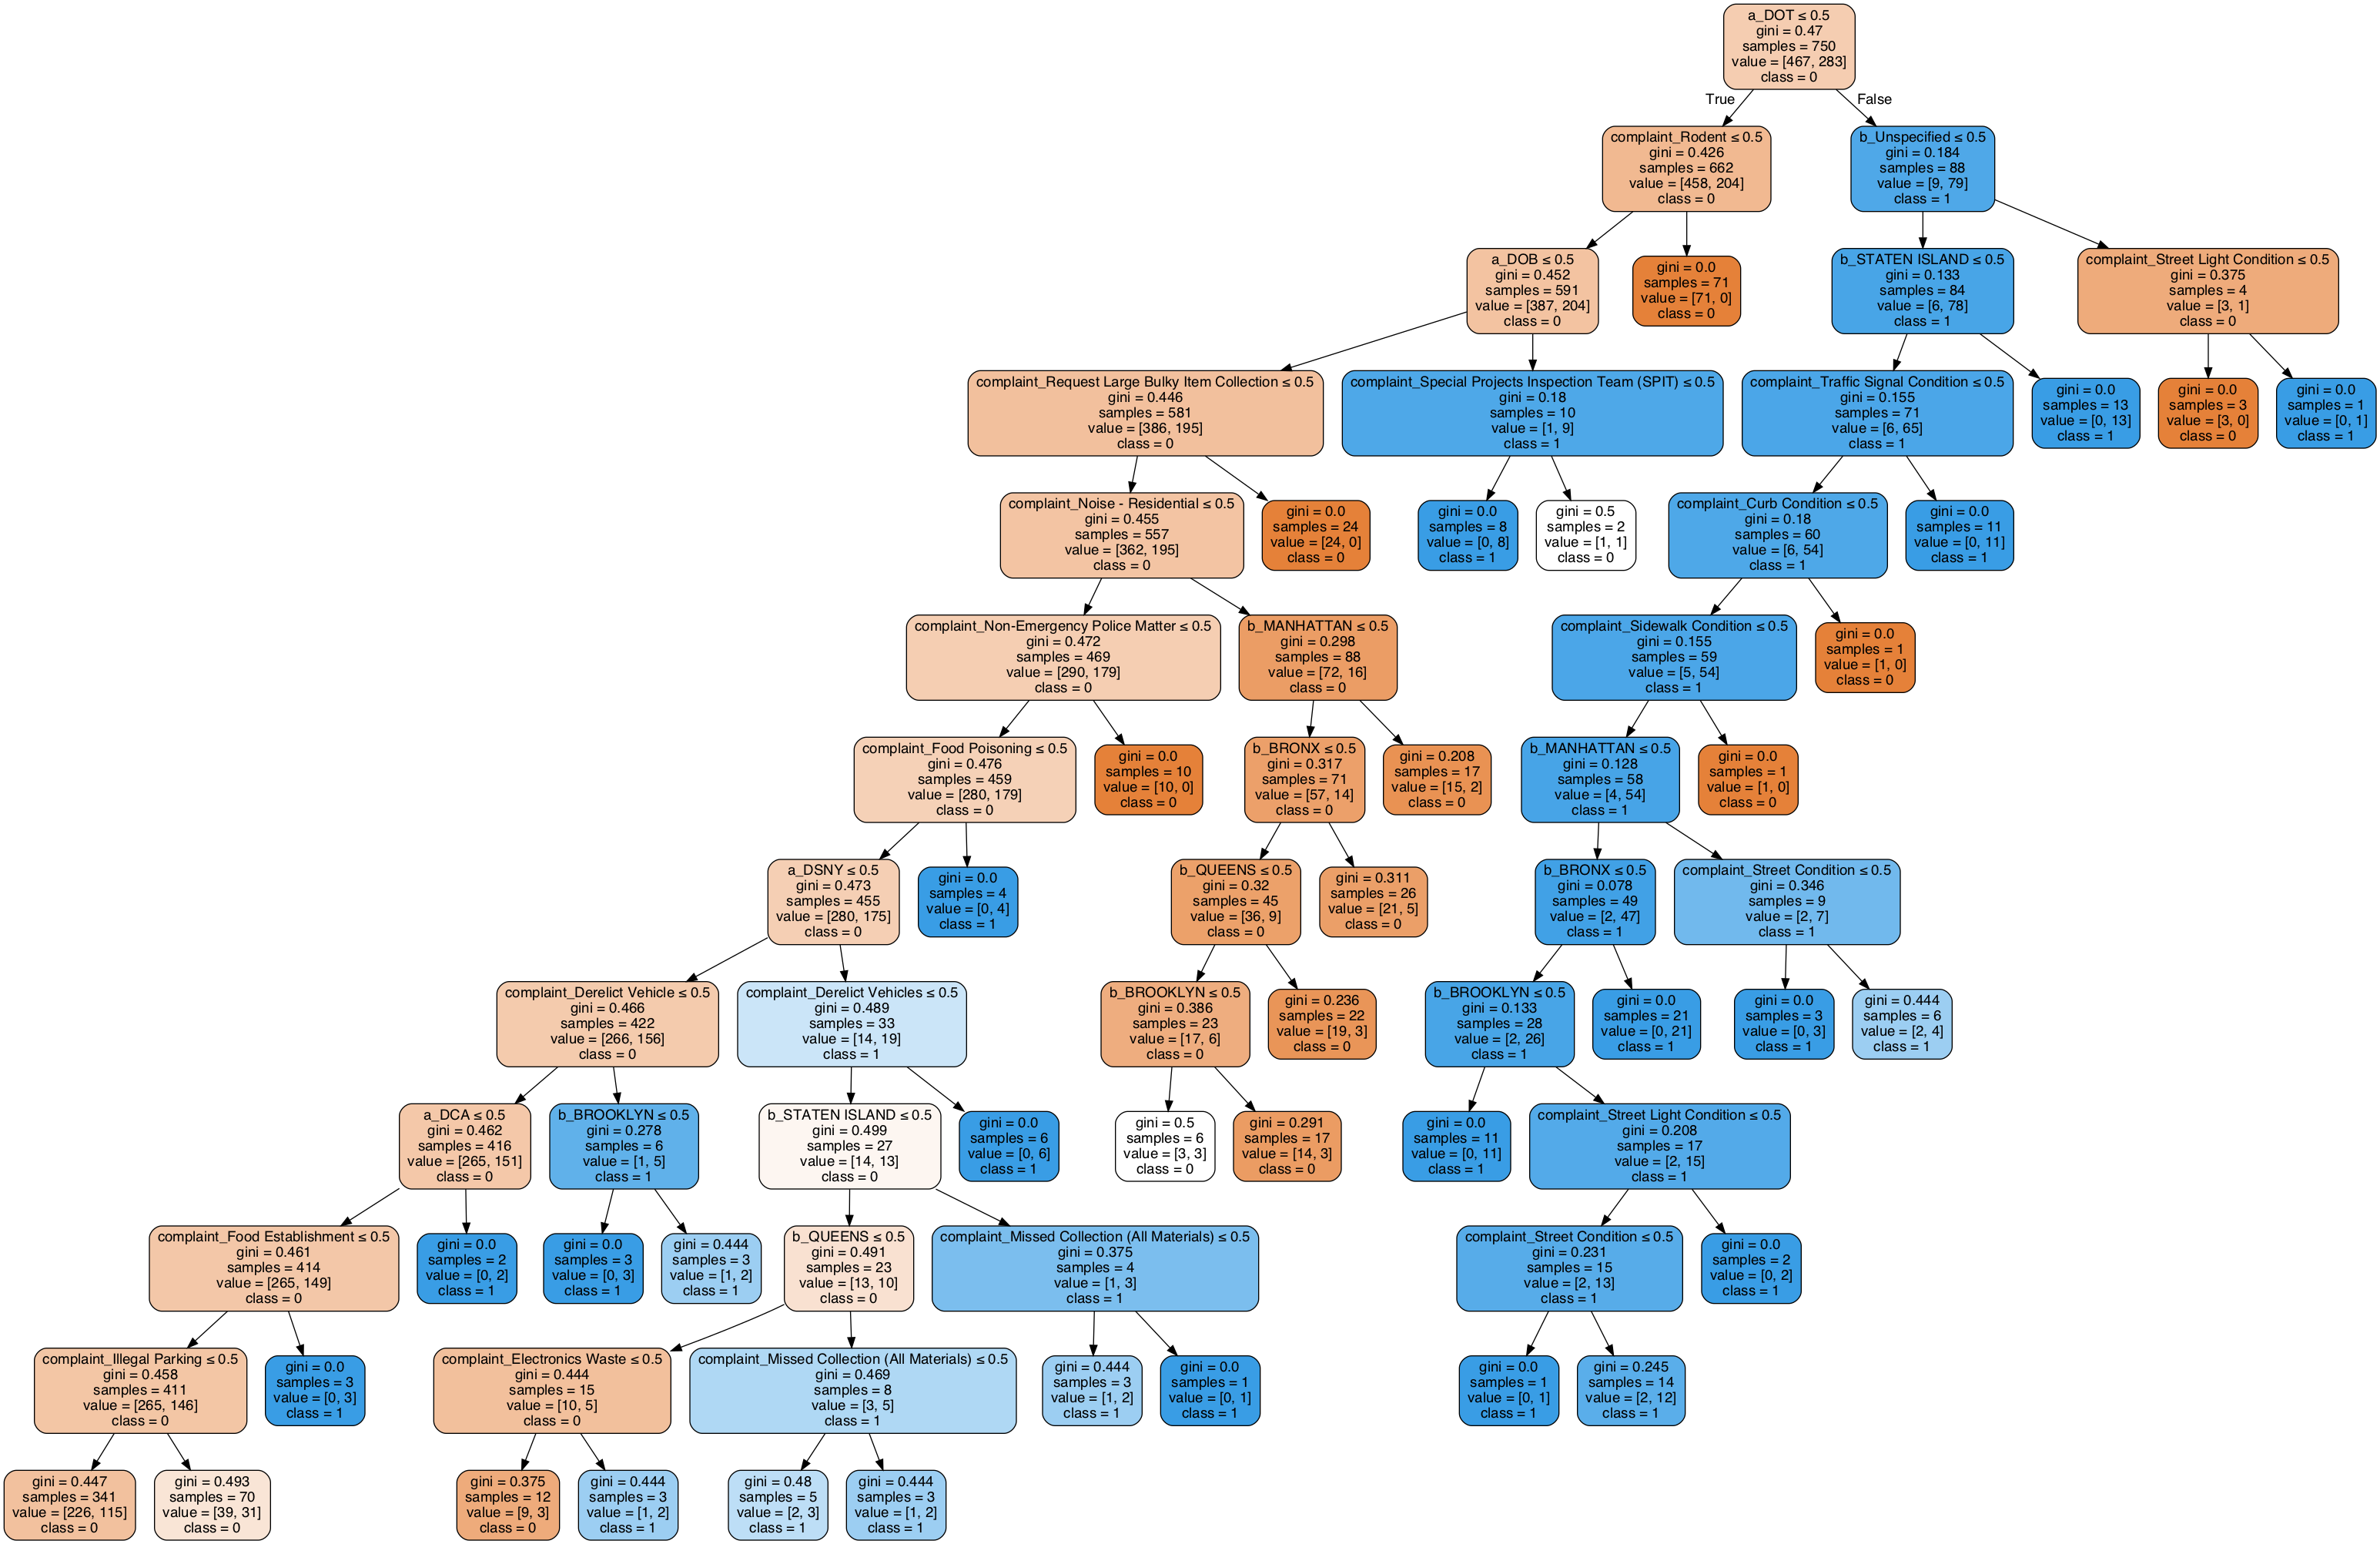

In [737]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('resolution_outcomes.png')
Image(graph.create_png())

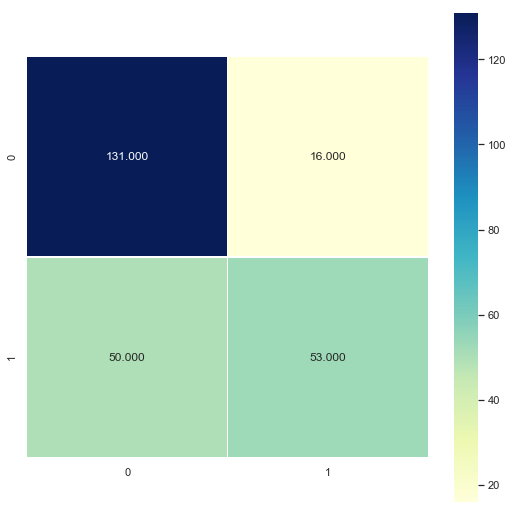

In [738]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# XGBoost

In [742]:
import xgboost as xgb
# import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [747]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

In [748]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [749]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [750]:
xg_clf.fit(X_train,y_train)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [751]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.724000
F1: 0.536913


kfold cross validation using XGBoost

In [753]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
#create dmatrix from our data.  unique to xgboost

In [754]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}
#boosted rounds is how many trees i'm going to make
#early stopping, 5 consecutive models where the model is not getting better, it will stop
#metric logloss b/c binary classification
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.677270           0.001786           0.677752   
1              0.668168           0.003849           0.668638   
2              0.661208           0.004683           0.662656   
3              0.655417           0.004724           0.656934   
4              0.647058           0.004745           0.648179   
5              0.640895           0.005617           0.643343   
6              0.635522           0.005609           0.638578   
7              0.629975           0.006759           0.633178   
8              0.627083           0.006296           0.630933   
9              0.623372           0.006435           0.627384   
10             0.620203           0.008286           0.624180   
11             0.616856           0.009457           0.620674   
12             0.612945           0.009289           0.617018   
13             0.610255           0.010192           0.615532   
14             0.606661           0.009531           0.611344   
15             0.603931           0.008937           0.608290   
16             0.601782           0.008631           0.606297   
17             0.598568           0.008748           0.603682   
18             0.596280           0.008765           0.601416   
19             0.594549           0.009516           0.600180   
20             0.593628           0.009691           0.599272   
21             0.592597           0.009411           0.598530   
22             0.591402           0.009712           0.597613   
23             0.590738           0.009497           0.597030   
24             0.589146           0.010056           0.596008   
25             0.588058           0.009580           0.594752   
26             0.587290           0.010149           0.593847   
27             0.585791           0.010582           0.592969   
28             0.584908           0.010062           0.591934   
29             0.584235           0.009655           0.591294   
..                  ...                ...                ...   
93             0.562750           0.010596           0.572531   
94             0.562668           0.010564           0.572520   
95             0.562590           0.010582           0.572426   
96             0.562469           0.010525           0.572339   
97             0.562398           0.010534           0.572447   
98             0.562240           0.010540           0.572383   
99             0.562204           0.010517           0.572326   
100            0.562139           0.010518           0.572327   
101            0.562058           0.010483           0.572306   
102            0.561967           0.010496           0.572203   
103            0.561768           0.010511           0.571844   
104            0.561610           0.010523           0.571699   
105            0.561569           0.010578           0.571508   
106            0.561461           0.010555           0.571589   
107            0.561382           0.010531           0.571563   
108            0.561302           0.010528           0.571580   
109            0.561195           0.010474           0.571408   
110            0.561117           0.010438           0.571369   
111            0.561023           0.010487           0.571150   
112            0.560953           0.010479           0.571056   
113            0.560891           0.010476           0.571103   
114            0.560841           0.010512           0.570990   
115            0.560761           0.010491           0.570745   
116            0.560694           0.010465           0.570753   
117            0.560577           0.010492           0.570835   
118            0.560493           0.010497           0.570580   
119            0.560452           0.010500           0.570531   
120            0.560391           0.010479           0.570543   
121            0.560354           0.010511           0.570351   
122            0.560324           0.0105

In [756]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [757]:
%matplotlib inline

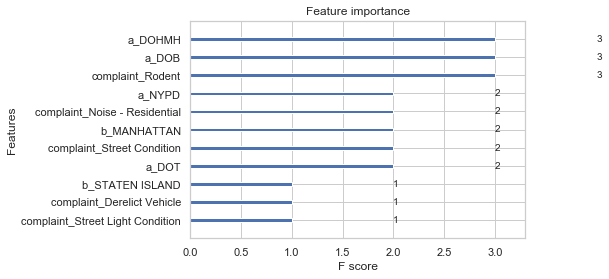

In [758]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [762]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg
#     feat_imp = pd.Series(alg.get_booster().get_fscore())
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [763]:
train  = pd.concat([X_train, y_train], axis=1)
target = 'resolution_outcome'
# IDcol = 'PassengerId'

In [764]:
train.head()

b_BRONX  b_BROOKLYN  b_MANHATTAN  b_QUEENS  b_STATEN ISLAND  \
271        0           0            0         1                0   
96         0           1            0         0                0   
79         0           1            0         0                0   
143        0           0            1         0                0   
461        0           0            0         1                0   

     b_Unspecified  a_DCA  a_DEP  a_DFTA  a_DHS         ...          \
271              0      0      0       0      0         ...           
96               0      0      0       0      0         ...           
79               0      0      0       0      0         ...           
143              0      0      0       0      0         ...           
461              0      0      0       0      0         ...           

     complaint_Street Sign - Damaged  complaint_Taxi Complaint  \
271                                0                         0   
96                                 0                         0   
79                                 0                         0   
143                                0                         0   
461                                0                         0   

     complaint_Traffic  complaint_Traffic Signal Condition  \
271                  0                                   0   
96                   0                                   0   
79                   0                                   0   
143                  0                                   0   
461                  0                                   0   

     complaint_UNSANITARY CONDITION  complaint_Unsanitary Animal Pvt Property  \
271                               0                                         0   
96                                0                                         0   
79                                0                                         0   
143                               0                                         0   
461                               0                                         0   

     complaint_WATER LEAK  complaint_Water Quality  complaint_Water System  \
271                     0                        0                       0   
96                      0                        0                       0   
79                      0                        0                       0   
143                     0                        0                       0   
461                     0                        0                       0   

     resolution_outcome  
271                   0  
96                    0  
79                    0  
143                   0  
461                   1  

[5 rows x 96 columns]

In [765]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [766]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.7347
AUC Score (Train): 0.803902


In [767]:
alg.feature_importances_

array([0.0007047 , 0.00606494, 0.00766601, 0.00291301, 0.01911581,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03574308, 0.04028026, 0.        , 0.16048484, 0.        ,
       0.04010618, 0.03895788, 0.03128926, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03349279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03988911, 0.03337783, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02535365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03196615,
       0.        , 0.        , 0.        , 0.00805275, 0.        ,
       0.        , 0.        , 0.03393457, 0.        , 0.02528559,
       0.02634043, 0.        , 0.        , 0.        , 0.     

In [768]:
alg.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)>

In [769]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1,verbose=5, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8, verbose=5),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [770]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [771]:
gsearch1.best_score_

0.7639346736780179

In [772]:
preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.732000
F1: 0.573248


In [773]:
from xgboost import plot_importance

NameError: name 'pyplot' is not defined

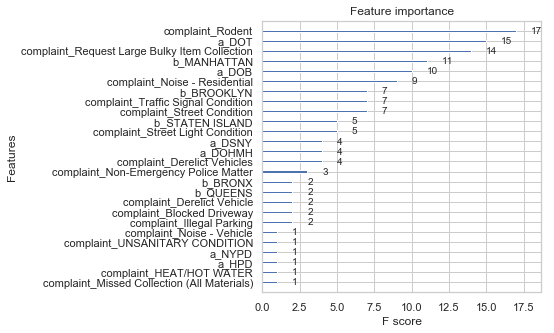

In [774]:
# plot feature importance
plot_importance(alg)
pyplot.show()

In [775]:
alg.get_booster().get_fscore()

{'complaint_Street Condition': 7,
 'complaint_Traffic Signal Condition': 7,
 'complaint_Street Light Condition': 5,
 'complaint_Derelict Vehicles': 4,
 'complaint_Illegal Parking': 2,
 'b_MANHATTAN': 11,
 'a_DOT': 15,
 'complaint_Rodent': 17,
 'a_DOB': 10,
 'complaint_Noise - Residential': 9,
 'complaint_Request Large Bulky Item Collection': 14,
 'a_DOHMH': 4,
 'a_DSNY': 4,
 'complaint_Blocked Driveway': 2,
 'complaint_Missed Collection (All Materials)': 1,
 'complaint_Derelict Vehicle': 2,
 'complaint_HEAT/HOT WATER': 1,
 'b_BROOKLYN': 7,
 'b_STATEN ISLAND': 5,
 'b_QUEENS': 2,
 'b_BRONX': 2,
 'complaint_Non-Emergency Police Matter': 3,
 'a_HPD': 1,
 'a_NYPD': 1,
 'complaint_UNSANITARY CONDITION': 1,
 'complaint_Noise - Vehicle': 1}